# EDA

Ce notebook traite de l'analyse exploratoire des jeux de donnée en utilisant un kernel Kaggle 
--> https://www.kaggle.com/code/rishabhrao/home-credit-default-risk-extensive-eda/notebook
Les fonctions python utilisées pour l'EDA sont extraites du Kernel ci-dessus.

## Chargement des librairies

In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import datetime
import sys
import time
import gc
import warnings

from datetime import datetime

# Warnings
warnings.filterwarnings('ignore')

## Chargement des données

In [2]:
# Cette fonction permet d'afficher tous les fichiers qui se trouvent dans un répertoire données et affiche aussi leur taille 
def file_listing_in_directory(directory_path):
   
    file_listing = list(os.listdir(directory_path))
    dataframe_fic = pd.DataFrame(file_listing, columns=['file_name'])
    dataframe_fic['Size_en_MB'] = dataframe_fic.file_name.apply(
        lambda x: round(os.stat(directory_path + x) .st_size / (1024 * 1024), 2))
    nb_fic = dataframe_fic.shape[0]
    if nb_fic > 1:
        display(str(nb_fic) + ' files present in directory :')
    else:
        display(str() + ' file found')

    return dataframe_fic.style.hide_index()

In [3]:
path=r"C:\\Users\\P7\\"
file_listing_in_directory(path)

'15 files present in directory :'

In [4]:
gc.collect()

194

In [5]:
# Cette fonction permet de lire apartir  des 10 datasets en format CSV ce qu'on a utiliser pour ce projet.

def load_all_datasets(directory_path='', verbose=True): # verbose cest pour importer tous
  
    if verbose:
        print("Chargement des jeux de donnees...")
        print("--------------------------------------------------------------------")
        start = datetime.now()

    application_train = pd.read_csv(directory_path + 'application_train.csv')
    if verbose:
        print("Fichier application_train.csv chargé -> dataframe : application_train")

    application_test = pd.read_csv(directory_path + 'application_test.csv')
    if verbose:
        print("Fichier application_test.csv chargé -> dataframe : application_test")

    bureau = pd.read_csv(directory_path + 'bureau.csv')
    if verbose:
        print("Fichier bureau.csv chargé -> dataframe : bureau")

    bureau_balance =None #pd.read_csv(directory_path + 'bureau_balance.csv')
    gc.collect()
    if verbose:
        print("Fichier bureau_balance.csv chargé -> dataframe : bureau_balance")

    cc_balance = pd.read_csv(directory_path + 'credit_card_balance.csv')
    if verbose:
        print("Fichier credit_card_balance.csv chargé -> dataframe : cc_balance")

    installments_payments = pd.read_csv(
        directory_path + 'installments_payments.csv')
    if verbose:
        print(
            "Fichier installments_payments.csv chargé -> dataframe : installments_payments")

    POS_CASH_balance = pd.read_csv(directory_path + 'POS_CASH_balance.csv')
    if verbose:
        print("Fichier POS_CASH_balance.csv chargé -> dataframe : POS_CASH_balance")

    HomeCredit_columns_description = pd.read_csv(
        directory_path +
        'HomeCredit_columns_description.csv',
        encoding='cp1252')
    del HomeCredit_columns_description['Unnamed: 0']
    if verbose:
        print("Fichier HomeCredit_columns_description.csv chargé -> dataframe : HomeCredit_columns_description")

    previous_application = pd.read_csv(
        directory_path + 'previous_application.csv')
    if verbose:
        print("Fichier previous_application.csv chargé -> dataframe : previous_application")

    if verbose:
        print("--------------------------------------------------------------------")
        print(
            f'Chargement des 9 jeux de donnees termineéen {datetime.now() - start} secondes')

    return application_train, application_test, bureau, bureau_balance, \
        cc_balance, installments_payments, POS_CASH_balance, previous_application, \
        HomeCredit_columns_description

In [6]:
application_train, application_test, bureau, bureau_balance, cc_balance, \
    installments_payments, POS_CASH_balance, previous_application, \
    HomeCredit_columns_description =load_all_datasets(path)

Chargement des jeux de donnees...
--------------------------------------------------------------------
Fichier application_train.csv chargé -> dataframe : application_train
Fichier application_test.csv chargé -> dataframe : application_test
Fichier bureau.csv chargé -> dataframe : bureau
Fichier bureau_balance.csv chargé -> dataframe : bureau_balance
Fichier credit_card_balance.csv chargé -> dataframe : cc_balance
Fichier installments_payments.csv chargé -> dataframe : installments_payments
Fichier POS_CASH_balance.csv chargé -> dataframe : POS_CASH_balance
Fichier HomeCredit_columns_description.csv chargé -> dataframe : HomeCredit_columns_description
Fichier previous_application.csv chargé -> dataframe : previous_application
--------------------------------------------------------------------
Chargement des 9 jeux de donnees termineéen 0:01:57.799111 secondes


In [7]:
 # Importer le dataset bureau_balance 
bureau_balance = pd.read_csv(path + 'bureau_balance.csv')

In [8]:
# Néttoyage de la mémoirer centrale des objets qui sont pas utliser par les programmes.
gc.collect()

0

In [9]:
# Cette fonction permet d'afficher des informations sur notre datasets à savoir numéros de lignes, la taille du dataset,le
# nombre des valeurs nans , le pourcentage des valeurs nans etc .

def resume_datasets(dataframes, name):
    
    print(f'data contains {len(dataframes)} file(s).')

    # Creating a DataFrame with useful information about all datasets
    df_resume = pd.DataFrame({})
    df_resume['datasets'] = name
    df_resume['Nb lignes'] = [df.shape[0] for df in dataframes]
    df_resume['Nb variables'] = [df.shape[1] for df in dataframes]
    df_resume['Nb nan'] = [df.isnull().sum().sum() for df in dataframes]
    df_resume['% nan'] = [(df.isnull().sum().sum() * 100 / np.product(df.shape)) for df in dataframes]
    df_resume['Nb var with nan'] = [len(
        [col for col, null in df.isnull().sum().items() if null > 0]) for df in dataframes]
    df_resume['Var with nan'] = [', '.join(
        [col for col, null in df.isnull().sum().items() if null > 0]) for df in dataframes]

    return df_resume.style.hide_index()

In [10]:
# Vue d'ensemble des 9 jeux de données
dataframes = [application_train, application_test, bureau, bureau_balance,
              cc_balance, installments_payments, POS_CASH_balance,
              previous_application, HomeCredit_columns_description]
names = ['application_train', 'application_test', 'bureau', 'bureau_balance',
        'cc_balance', 'installments_payments', 'POS_CASH_balance',
        'previous_application', 'HomeCredit_columns_description']
resume_datasets(dataframes, names)

data contains 9 file(s).


## 1-Fichier application_train.csv

In [11]:
# compréhension des variables 

In [12]:
# application_train contient les demandes de prets.

df_var_appli_train = \
    HomeCredit_columns_description[HomeCredit_columns_description['Table']
                                   == 'application_{train|test}.csv']
df_var_appli_train.style.hide_index()

In [13]:
# Cette fonction permet d'afficher les statistics de base pour un dataset données.

def display_basic_statistics(dataframe, title='application_train'):
    print('-' * 80)
    # Taille : nombre de lignes/colonnes
    nRow, nVar = dataframe.shape
    print(f'datasets contains  {nRow} lines and {nVar} variables.')
    print('-' * 80)
    duplicate = \
        dataframe.shape[0] - dataframe.duplicated().shape[0]
    print(f'Numbre de valeurs dupliquées dans {title} : {duplicate}')
    print('-' * 79)
    print('Contenu des 3 premières lignes :')
    display(dataframe.head(3))

In [14]:
display_basic_statistics(application_train)

--------------------------------------------------------------------------------
datasets contains  307511 lines and 122 variables.
--------------------------------------------------------------------------------
Numbre de valeurs dupliquées dans application_train : 0
-------------------------------------------------------------------------------
Contenu des 3 premières lignes :


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  

[3 rows x 122 columns]

In [15]:
# pour concatiner les datasets, creer un liste, et pd.concat([df1, df2]) pour concatiner les rows/lignes
# pd.concat([df1, df2], axis=1) pour concatiner les cols
#df = pd.concat([df1, df2], ignore_index = True), irrespective of row_numbers we can concatinate

# if all dataframes have same number of cols, second dataframe added to first dataframe at the end of dataframe
# if all dataframes have different number of cols, then second dataframe is added to right side of first dataframe but 
# where there r no cols as first df, it repalce with naNs in df2.

# df= pd.concat()
# function---- ex: 
# method---- ex: concat 


In [16]:
# Cette fonction permet d'afficher la description des variables( Qualitatif et Quantitatif )

def variables_description(dataframe, type_var='all'):
    
    df_taille = dataframe.shape[0]
    # le cas de variables numeric
    if type_var == 'num':
        desc_var = dataframe.describe(datetime_is_numeric=True)
    # le cas de variables categorielle
    elif type_var == 'cat':
        desc_var = dataframe.describe(exclude=[np.number], datetime_is_numeric=True)
    # le cas des autres types
    else:
        desc_var = dataframe.describe(include='all', datetime_is_numeric=True)
    
    # le type de variable qui constitue le dataframe
    desc_type = pd.DataFrame( dataframe[desc_var.columns].dtypes, columns=['type']).T
    
    # le nombre des valeurs nulls
    nb_nan = df_taille - desc_var.loc['count'].T
    pourcentage_nan = nb_nan * 100 / np.product(dataframe.shape)
    
    # le pourcentage des valeurs nulls
    desc_nan = pd.DataFrame([nb_nan, pourcentage_nan],
                            index=['nb_nan', '%_nan'])
    desc_var = pd.concat([desc_type, desc_nan, desc_var])

    return desc_var

In [17]:
# Résumé des variables
desc_appli_train = variables_description(application_train)
desc_appli_train

SK_ID_CURR    TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
type            int64     int64             object      object       object   
nb_nan            0.0       0.0                0.0         0.0          0.0   
%_nan             0.0       0.0                0.0         0.0          0.0   
count        307511.0  307511.0             307511      307511       307511   
unique            NaN       NaN                  2           3            2   
top               NaN       NaN         Cash loans           F            N   
freq              NaN       NaN             278232      202448       202924   
mean    278180.518577  0.080729                NaN         NaN          NaN   
std     102790.175348  0.272419                NaN         NaN          NaN   
min          100002.0       0.0                NaN         NaN          NaN   
25%          189145.5       0.0                NaN         NaN          NaN   
50%          278202.0       0.0                NaN         NaN          NaN   
75%          367142.5       0.0                NaN         NaN          NaN   
max          456255.0       1.0                NaN         NaN          NaN   

       FLAG_OWN_REALTY CNT_CHILDREN AMT_INCOME_TOTAL     AMT_CREDIT  \
type            object        int64          float64        float64   
nb_nan             0.0          0.0              0.0            0.0   
%_nan              0.0          0.0              0.0            0.0   
count           307511     307511.0         307511.0       307511.0   
unique               2          NaN              NaN            NaN   
top                  Y          NaN              NaN            NaN   
freq            213312          NaN              NaN            NaN   
mean               NaN     0.417052    168797.919297  599025.999706   
std                NaN     0.722121    237123.146279  402490.776996   
min                NaN          0.0          25650.0        45000.0   
25%                NaN          0.0         112500.0       270000.0   
50%                NaN          0.0         147150.0       513531.0   
75%                NaN          1.0         202500.0       808650.0   
max                NaN         19.0      117000000.0      4050000.0   

         AMT_ANNUITY  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
type         float64  ...            int64            int64            int64   
nb_nan          12.0  ...              0.0              0.0              0.0   
%_nan       0.000032  ...              0.0              0.0              0.0   
count       307499.0  ...         307511.0         307511.0         307511.0   
unique           NaN  ...              NaN              NaN              NaN   
top              NaN  ...              NaN              NaN              NaN   
freq             NaN  ...              NaN              NaN              NaN   
mean    27108.573909  ...          0.00813         0.000595         0.000507   
std     14493.737315  ...         0.089798         0.024387         0.022518   
min           1615.5  ...              0.0              0.0              0.0   
25%          16524.0  ...              0.0              0.0              0.0   
50%          24903.0  ...              0.0              0.0              0.0   
75%          34596.0  ...              0.0              0.0              0.0   
max         258025.5  ...              1.0              1.0              1.0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
type              int64                    float64                   float64   
nb_nan              0.0                    41519.0                   41519.0   
%_nan               0.0                   0.110669                  0.110669   
count          307511.0                   265992.0                  265992.0   
unique              NaN                        NaN                       NaN   
top                 NaN                        NaN                       NaN  

In [18]:
# Exploration des valeurs nulls

In [19]:
# Cette fonction permet de savoir le nombre total ainsi que pourcentage des valeurs nulls pour un dataset données

def get_missing_values(df_work, pourcentage, affiche_heatmap):
  
    # 1. Nombre de valeurs manquantes totales
    nb_nan_tot = df_work.isna().sum().sum()
    nb_donnees_tot = np.product(df_work.shape)
    pourc_nan_tot = round((nb_nan_tot / nb_donnees_tot) * 100, 2)
    print(
        f'Valeurs manquantes : {nb_nan_tot} NaN pour {nb_donnees_tot} données ({pourc_nan_tot} %)')

    if pourcentage:
        print("-------------------------------------------------------------")
        print("Nombre et pourcentage de valeurs manquantes par variable\n")
        
        # 2. Visualisation du nombre et du pourcentage de valeurs manquantes
        # par variable
        
        values = df_work.isnull().sum()
        percentage = 100 * values / len(df_work)
        table = pd.concat([values, percentage.round(2)], axis=1)
        table.columns = [
            'Nombres de valeurs manquantes',
            '% de valeurs manquantes']
        display(table[table['Nombres de valeurs manquantes'] != 0]
                .sort_values('% de valeurs manquantes', ascending=False)
                .style.background_gradient('seismic'))
        
    # Affichage de heatmap si la variable affiche_heatmap=True

    if affiche_heatmap:
        print("-------------------------------------------------------------")
        print("Heatmap de visualisation des valeurs manquantes")
        # 3. Heatmap de visualisation des valeurs manquantes
        plt.figure(figsize=(20, 10))
        sns.heatmap(df_work.isna(), cbar=False)
        plt.show()


Valeurs manquantes : 9152465 NaN pour 37516342 données (24.4 %)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



-------------------------------------------------------------
Heatmap de visualisation des valeurs manquantes


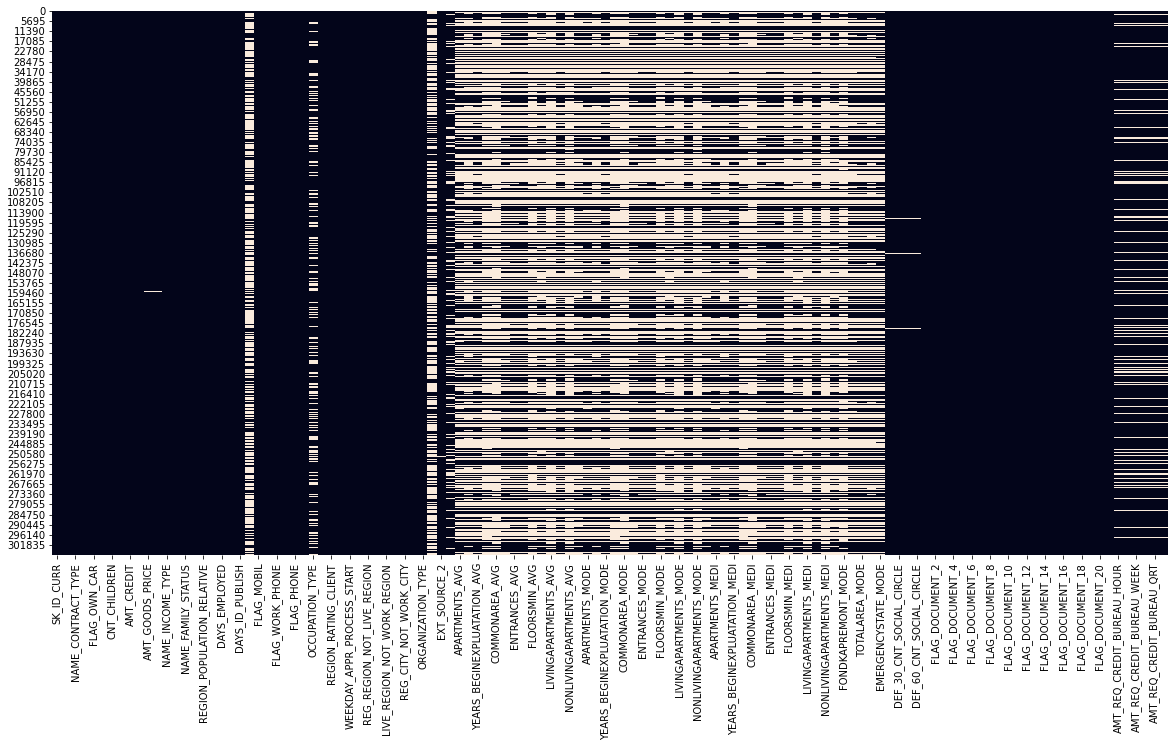

In [20]:
get_missing_values(application_train, True, True)

In [21]:
# Cette fonction permet d'afficher un dataset qui contient le pourcentage des nans pour les cols de dataset données

def nan_df_create(data):
   
    # Calcul des pourcentages valeurs nans
    nan_percentages = data.isna().sum() * 100 / len(data)
    df = pd.DataFrame({'column': nan_percentages.index,
                       'percent': nan_percentages.values})

    # sorting the dataframe by decreasing order of percentage of NaN values
    df.sort_values(by='percent', ascending=False, inplace=True)

    return df

In [22]:
# Affichage des valeurs nans pour un dataset données (Plot bar)

def plot_nan_percent(df_nan, title_name, tight_layout=True, figsize=(20, 8),
                     grid=False, rotation=90, fontsize=16):
    
    sns.set(style='white', font_scale=1.2)
    # checking if there is any column with NaNs or not.
    if df_nan.percent.sum() != 0:
        print(f"Nombre de variables avec valeurs manquantes : {df_nan[df_nan['percent'] != 0].shape[0]}")

        # plotting the Bar-Plot for NaN percentages (only for columns with
        # Non-Zero percentage of NaN values)
        plt.figure(figsize=figsize, tight_layout=tight_layout)
        sns.barplot(x='column', y='percent',
                    data=df_nan[df_nan['percent'] > 0])
        plt.xticks(rotation=rotation)
        plt.xlabel('Nom de variable', fontsize=fontsize)
        plt.ylabel('% de valeurs NaN', fontsize=fontsize)
        plt.xticks(fontsize=fontsize)
        plt.yticks(fontsize=fontsize)
        plt.title(f'Pourcentage de valeurs NaN dans {title_name}', fontsize=fontsize+4)
        if grid:
            plt.grid()
        plt.show()
    else:
        print(
            f"Le dataframe {title_name} ne contient pas de valeurs manquantes.")

Nombre de variables avec valeurs manquantes : 67


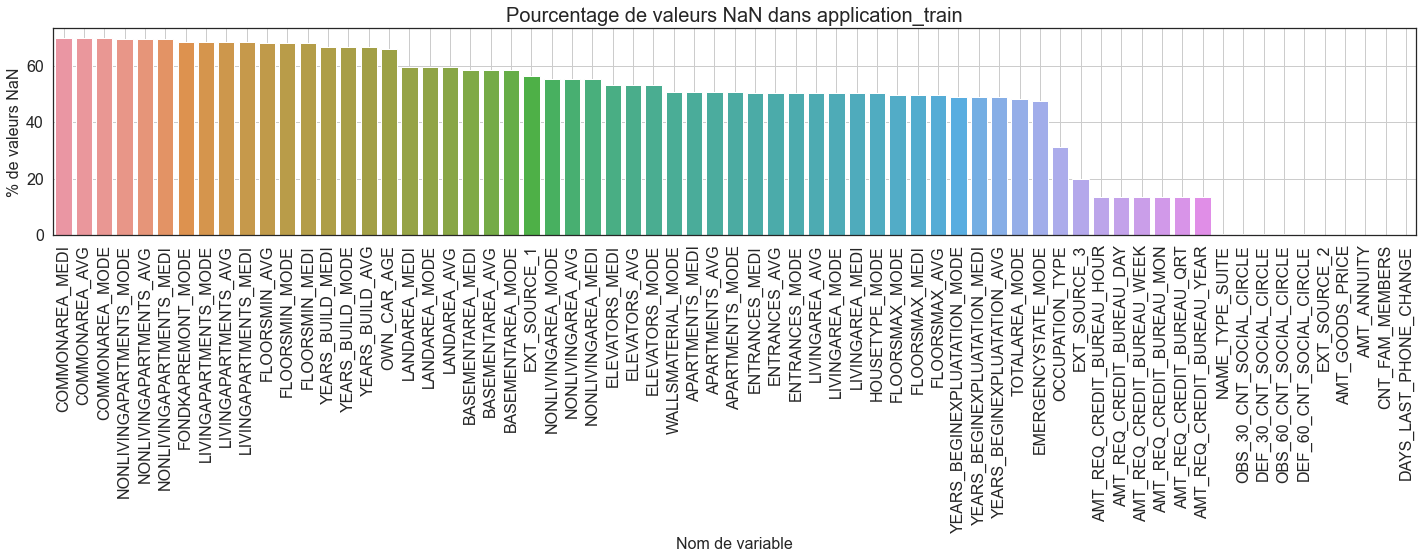

In [23]:
# Réprésentation visuelle des valeurs manquantes
df_nan = nan_df_create(application_train)
plot_nan_percent(df_nan, 'application_train', grid=True)

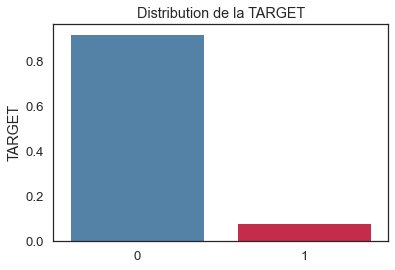

In [24]:
# Affichage de la distribution du risk de credits (nombre de demandes risqués, et nombre de demandes non-risqués)

sns.barplot(x=[0, 1],
            y=application_train['TARGET'].value_counts(normalize=True),
            palette=['SteelBlue', 'crimson'])
plt.title('Distribution de la TARGET')
plt.show()

### VARIABLES QUALITATIF

In [25]:
# Liste des variables qualitatives
cols_cat = \
    application_train.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [26]:
# Affichage des variables catégorielle 

def display_unique_categories(data, column_name, show_counts=False):
    

    print('-' * 80)
    print(
        f"Les catégories uniques de la variable '{column_name}' sont :\n{data[column_name].unique()}")
    print('-' * 80)

    if show_counts:
        print(
            f"Répartition dans chaque catégorie :\n{data[column_name].value_counts()}")
        print('-' * 80)

In [27]:
display_unique_categories(application_train, 'NAME_CONTRACT_TYPE')


--------------------------------------------------------------------------------
Les catégories uniques de la variable 'NAME_CONTRACT_TYPE' sont :
['Cash loans' 'Revolving loans']
--------------------------------------------------------------------------------


In [28]:
def plot_barplot_comp_target(dataframe, feature_name,
                             labels=['Non-défaillant', 'Défaillant'],
                             palette=['SteelBlue', 'crimson'],
                             rotation=0):
    sns.countplot(x=dataframe[feature_name], hue=dataframe.TARGET,
                  data=dataframe, palette=palette)
    plt.xticks(rotation=rotation)
    plt.title(f'Distribution de {feature_name} par défaillant/non-défaillant')
    plt.legend(labels=labels,
               bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.show()

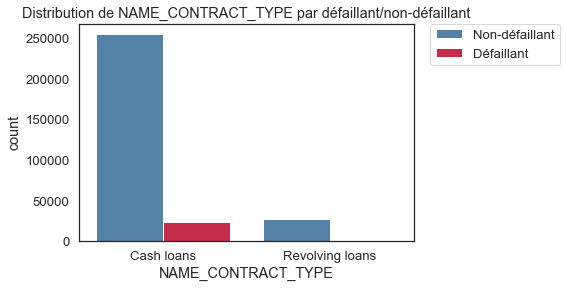

In [29]:
plot_barplot_comp_target(application_train,'NAME_CONTRACT_TYPE')

In [30]:
display_unique_categories(application_train,'CODE_GENDER',show_counts=True)

--------------------------------------------------------------------------------
Les catégories uniques de la variable 'CODE_GENDER' sont :
['M' 'F' 'XNA']
--------------------------------------------------------------------------------
Répartition dans chaque catégorie :
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
--------------------------------------------------------------------------------


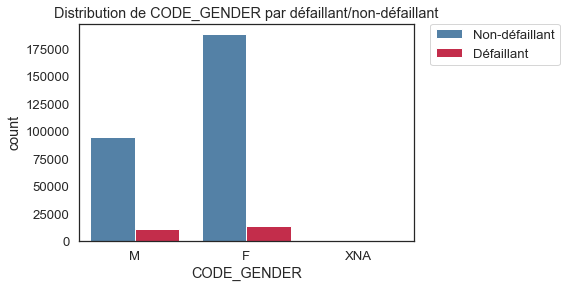

In [31]:
plot_barplot_comp_target(application_train,'CODE_GENDER')

In [32]:
display_unique_categories(application_train,'FLAG_EMP_PHONE')

--------------------------------------------------------------------------------
Les catégories uniques de la variable 'FLAG_EMP_PHONE' sont :
[1 0]
--------------------------------------------------------------------------------


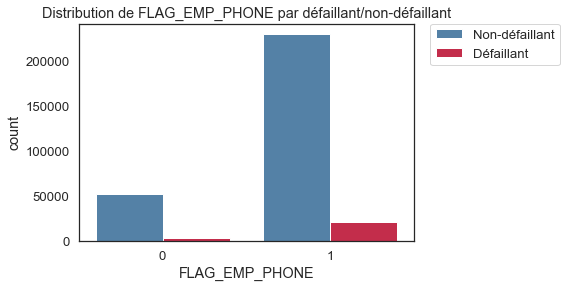

In [33]:
plot_barplot_comp_target(application_train,'FLAG_EMP_PHONE')

In [34]:
display_unique_categories(application_train, 'REGION_RATING_CLIENT_W_CITY')

--------------------------------------------------------------------------------
Les catégories uniques de la variable 'REGION_RATING_CLIENT_W_CITY' sont :
[2 1 3]
--------------------------------------------------------------------------------


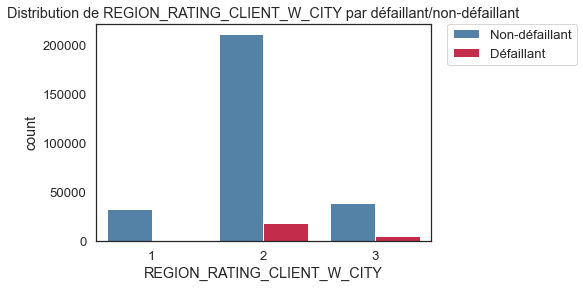

In [35]:
plot_barplot_comp_target(application_train,'REGION_RATING_CLIENT_W_CITY')

In [36]:
display_unique_categories(application_train,'NAME_EDUCATION_TYPE',show_counts=True)


--------------------------------------------------------------------------------
Les catégories uniques de la variable 'NAME_EDUCATION_TYPE' sont :
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
--------------------------------------------------------------------------------
Répartition dans chaque catégorie :
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64
--------------------------------------------------------------------------------


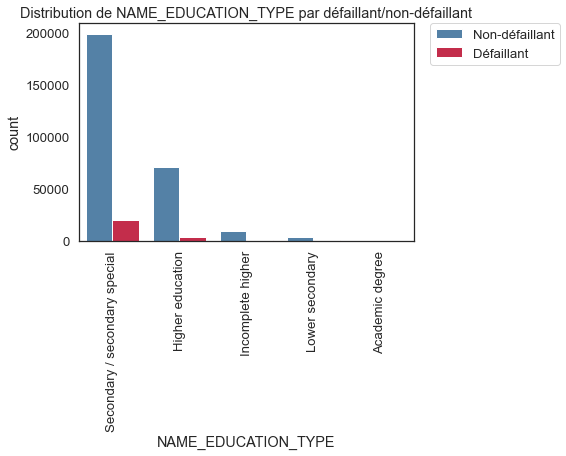

In [37]:
plot_barplot_comp_target(application_train,'NAME_EDUCATION_TYPE',rotation=90) 

In [38]:
display_unique_categories(application_train,'OCCUPATION_TYPE')

--------------------------------------------------------------------------------
Les catégories uniques de la variable 'OCCUPATION_TYPE' sont :
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Cooking staff' 'Private service staff'
 'Medicine staff' 'Security staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
--------------------------------------------------------------------------------


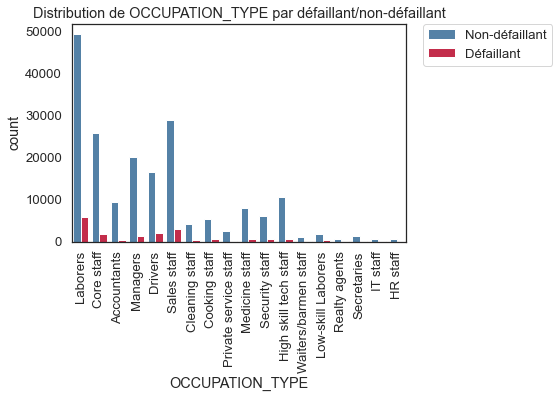

In [39]:
plot_barplot_comp_target(application_train,'OCCUPATION_TYPE', rotation=90)

Nombre de catégorie de la variable ORGANIZATION_TYPE = 58


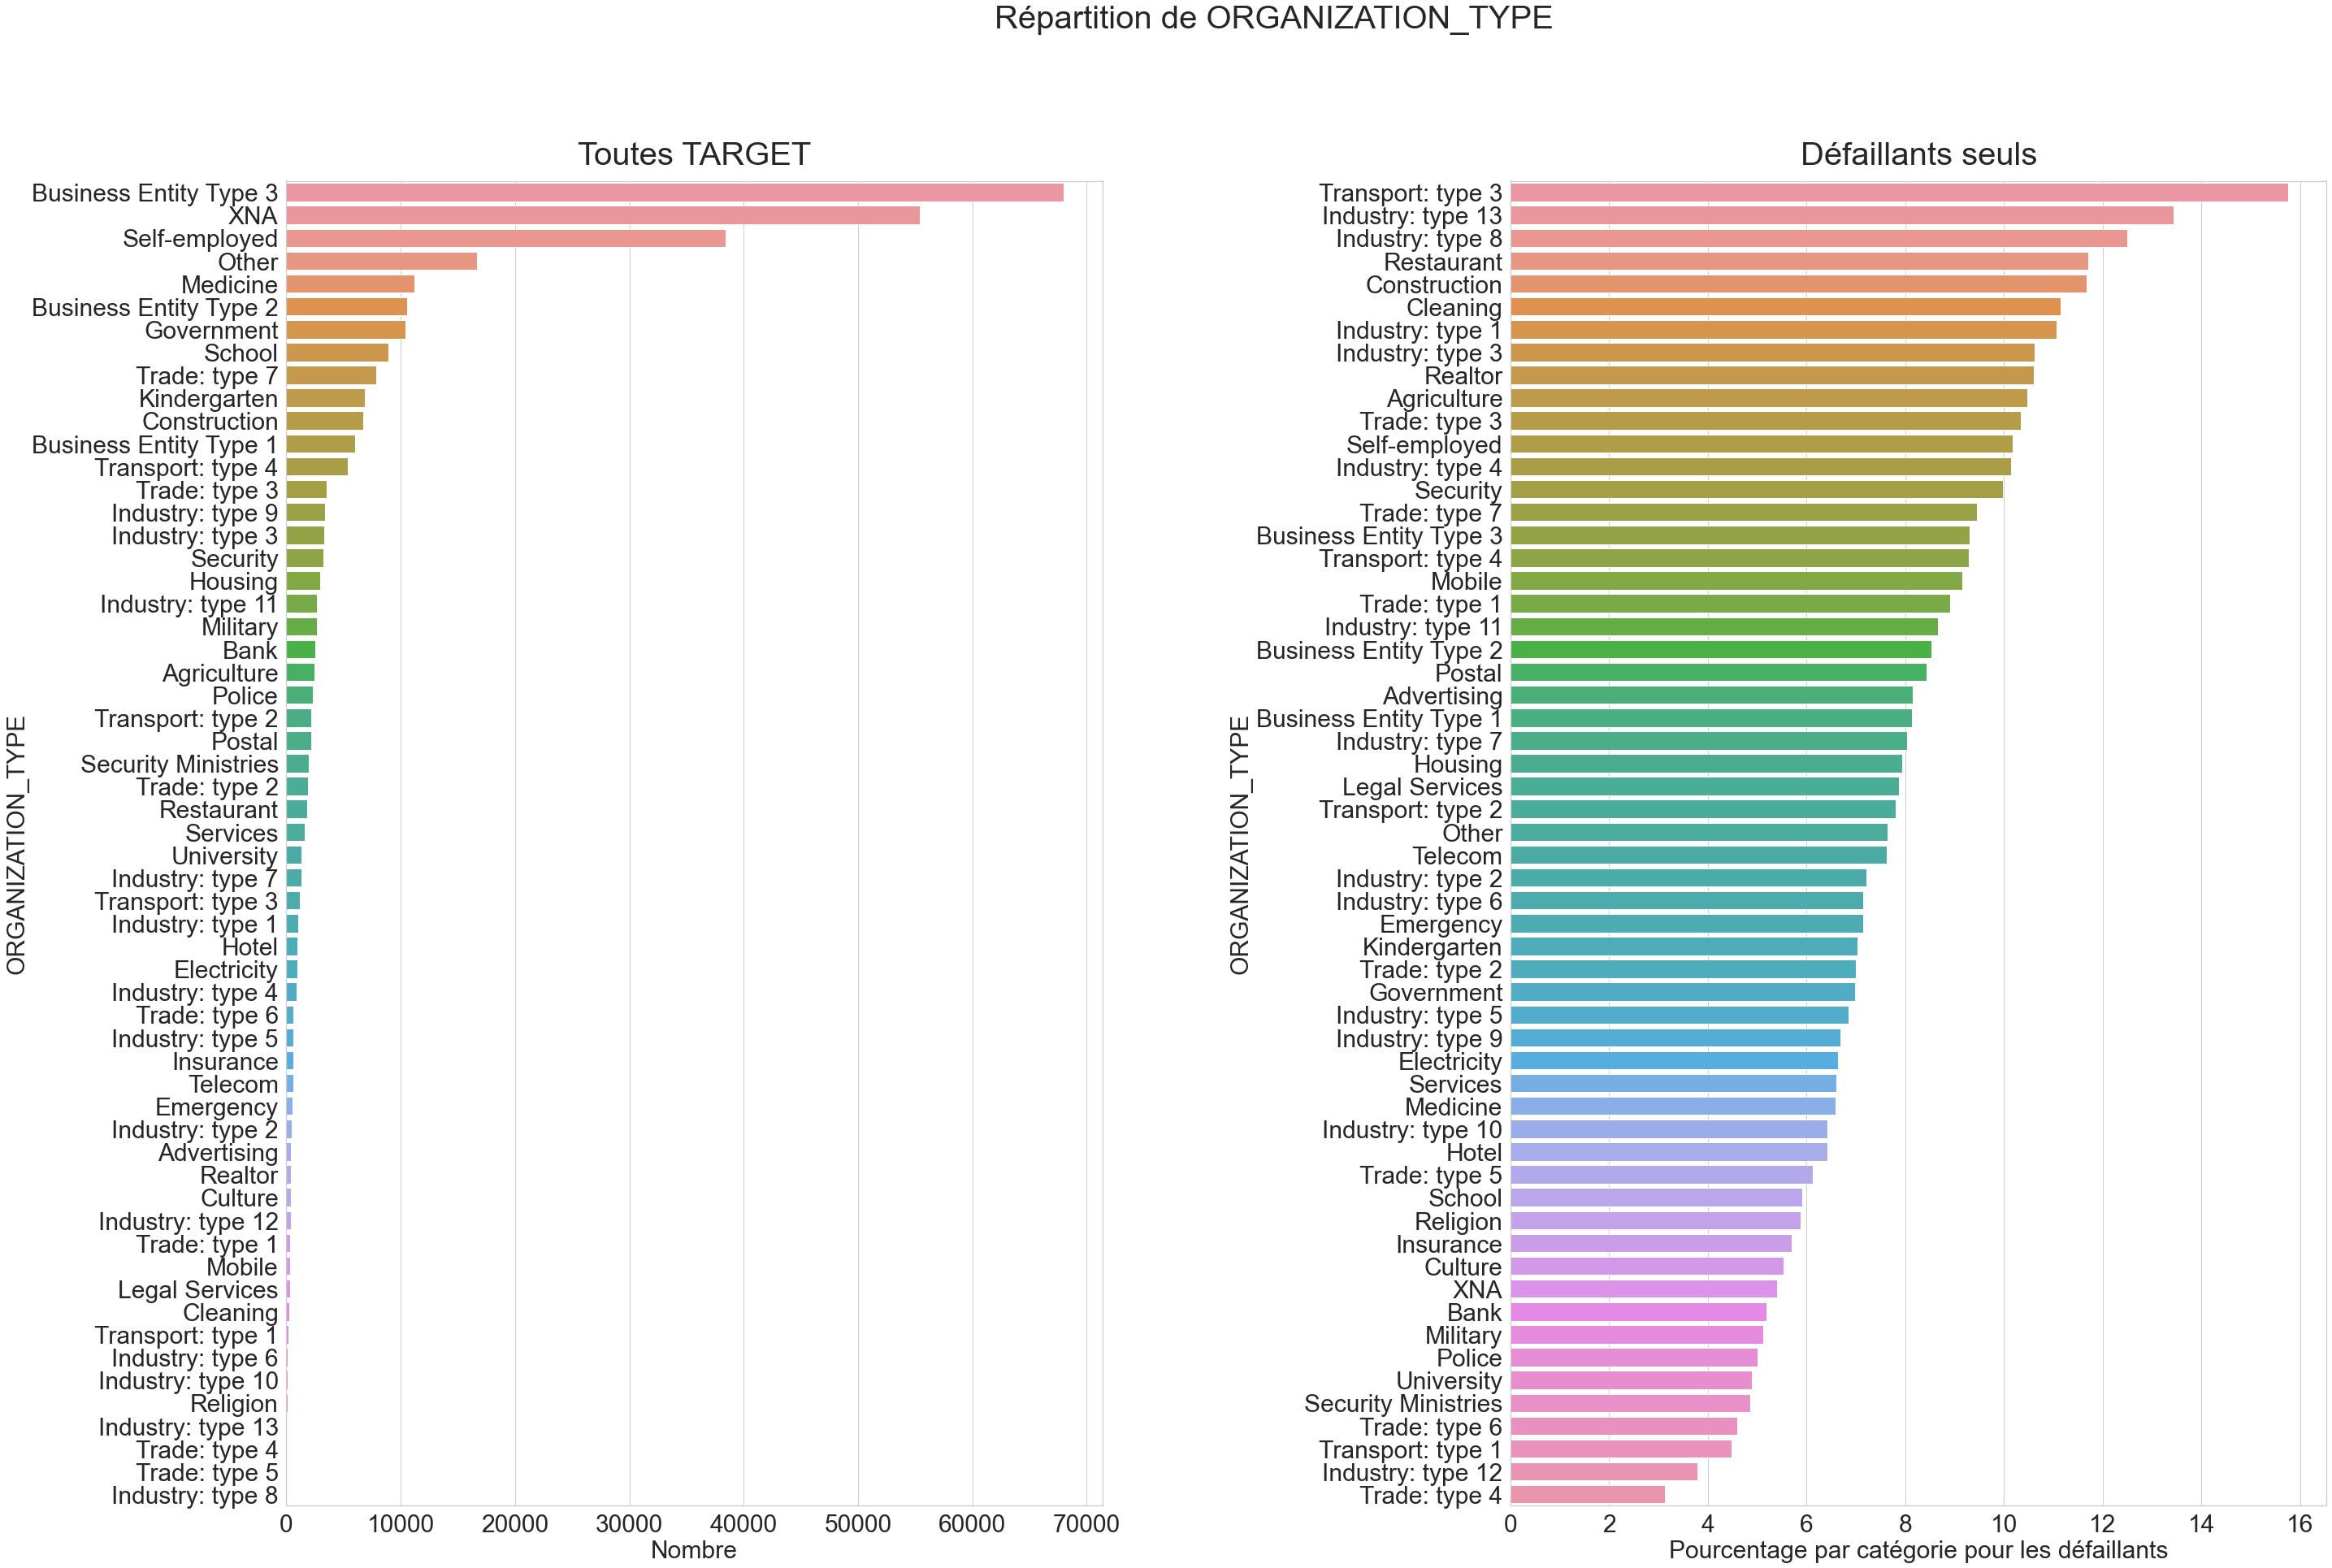

In [40]:
print(f"Nombre de catégorie de la variable ORGANIZATION_TYPE = \
{len(application_train.ORGANIZATION_TYPE.unique())}")

plt.figure(figsize=(45, 30))
sns.set(style='whitegrid', font_scale=1.2)
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
count_organization = application_train.ORGANIZATION_TYPE.value_counts() \
    .sort_values(ascending=False)
sns.barplot(x=count_organization, y=count_organization.index)
plt.title('Toutes TARGET', pad=20, fontsize=40)
plt.xlabel('Nombre', fontsize=30)
plt.ylabel('ORGANIZATION_TYPE', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.subplot(1, 2, 2)
percentage_default_per_organization = \
    application_train[application_train.TARGET == 1].ORGANIZATION_TYPE. \
    value_counts() * 100 / count_organization
percentage_default_per_organization = \
    percentage_default_per_organization.dropna(). \
    sort_values(ascending=False)
sns.barplot(x=percentage_default_per_organization,
            y=percentage_default_per_organization.index)
plt.title('Défaillants seuls', pad=20, fontsize=40)
plt.xlabel('Pourcentage par catégorie pour les défaillants', fontsize=30)
plt.ylabel('ORGANIZATION_TYPE', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.suptitle(f'Répartition de ORGANIZATION_TYPE', fontsize=40)
plt.show()

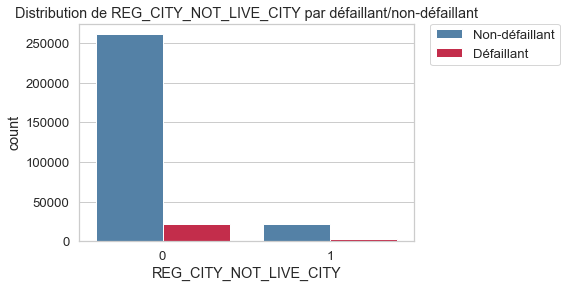

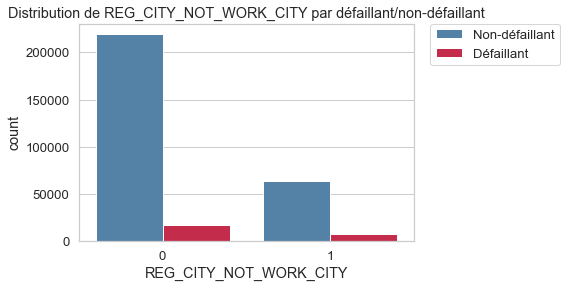

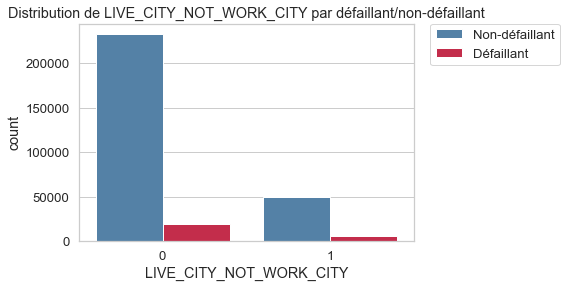

In [41]:
plot_barplot_comp_target(application_train, 'REG_CITY_NOT_LIVE_CITY')
plot_barplot_comp_target(application_train, 'REG_CITY_NOT_WORK_CITY')
plot_barplot_comp_target(application_train, 'LIVE_CITY_NOT_WORK_CITY')


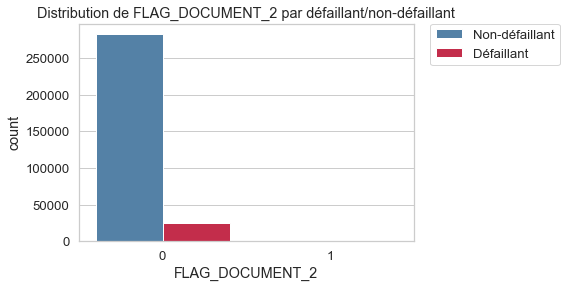

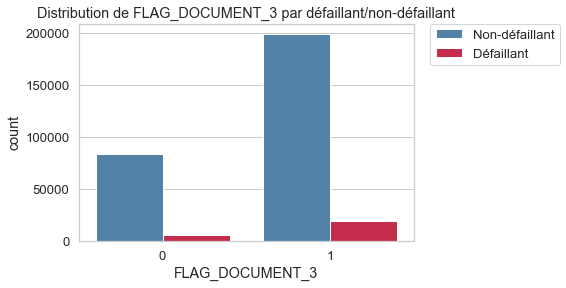

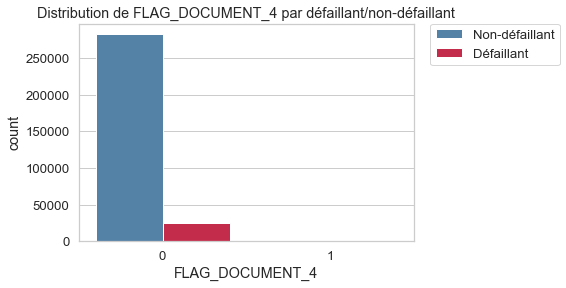

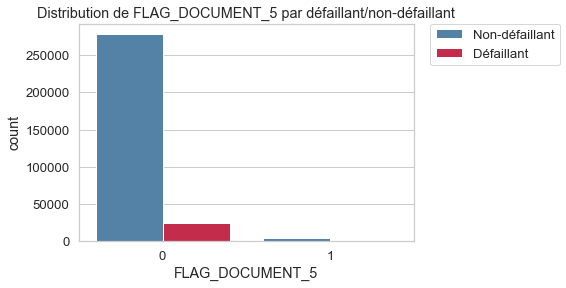

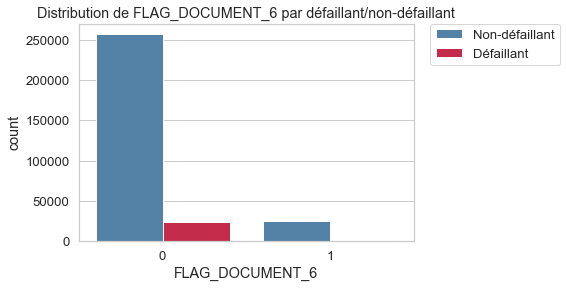

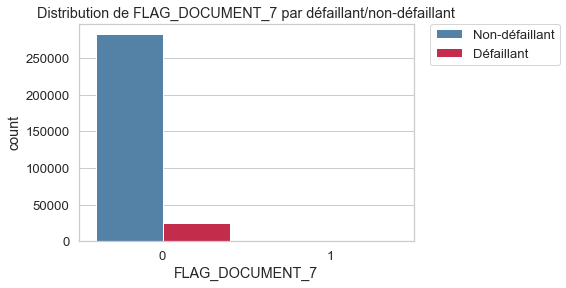

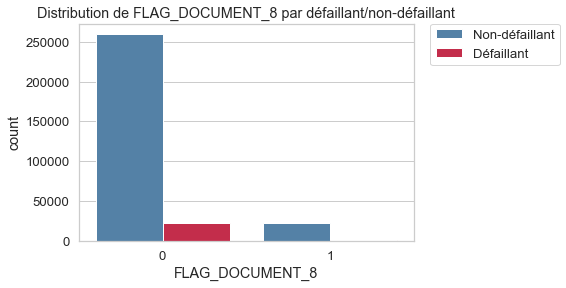

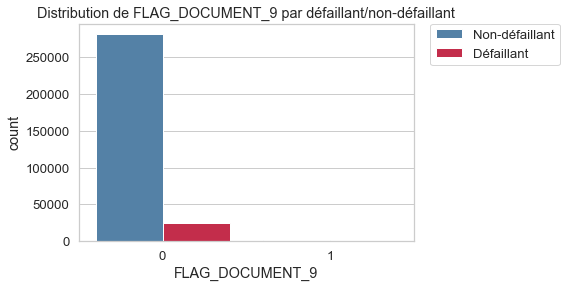

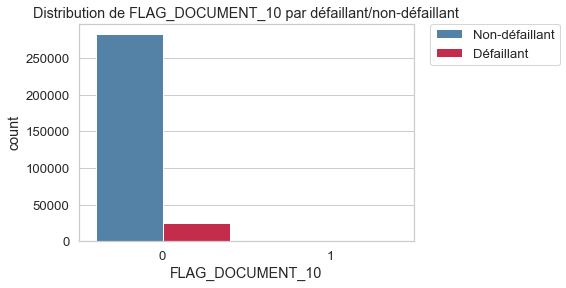

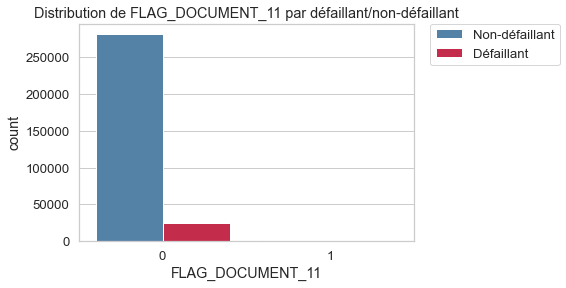

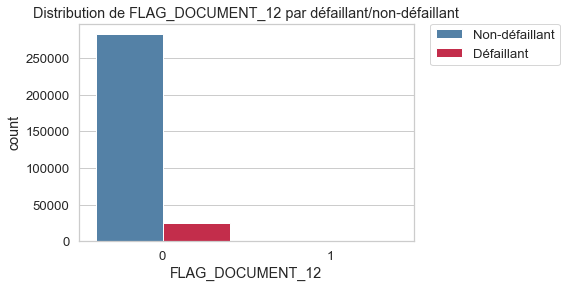

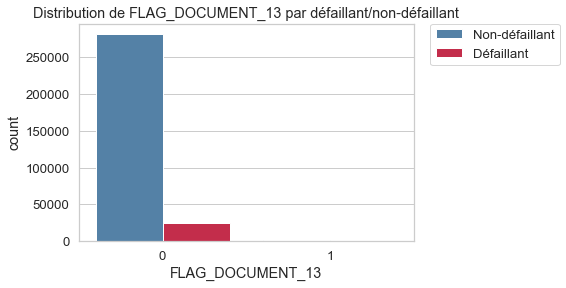

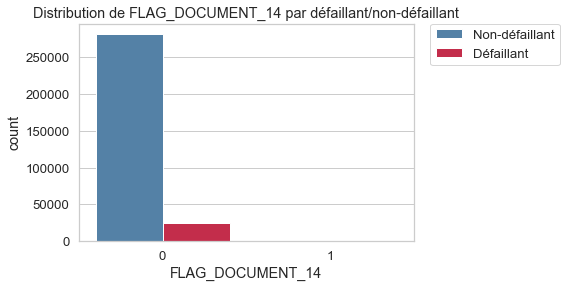

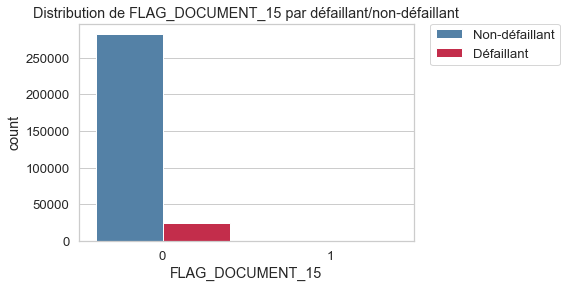

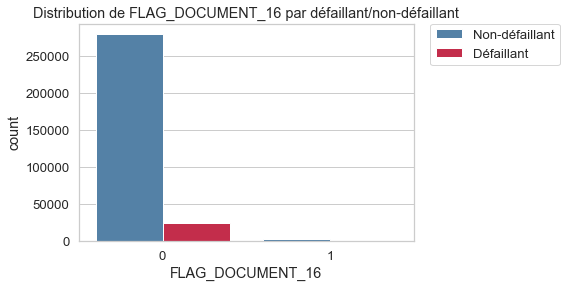

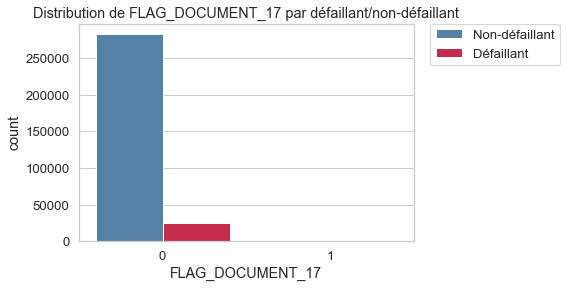

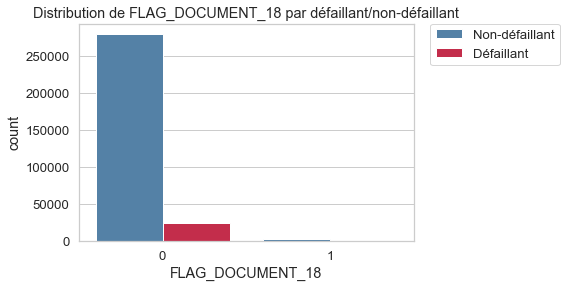

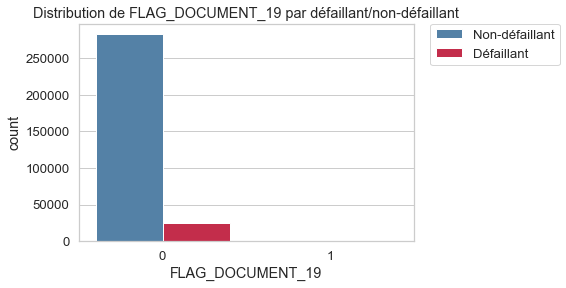

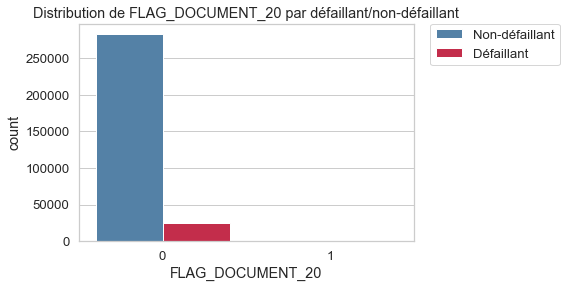

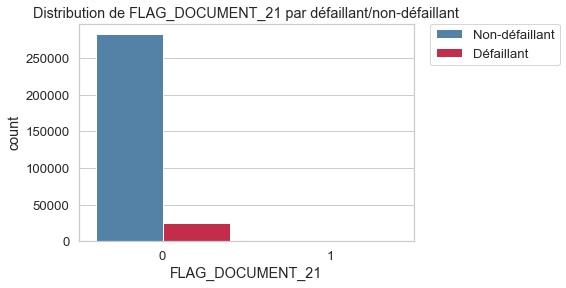

In [42]:
plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_2')
plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_3')
plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_4')
plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_5')
plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_6')
plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_7')
plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_8')
plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_9')
plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_10')
plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_11')
plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_12')
plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_13')
plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_14')
plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_15')
plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_16')
plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_17')
plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_18')
plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_19')
plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_20')
plot_barplot_comp_target(application_train,'FLAG_DOCUMENT_21')


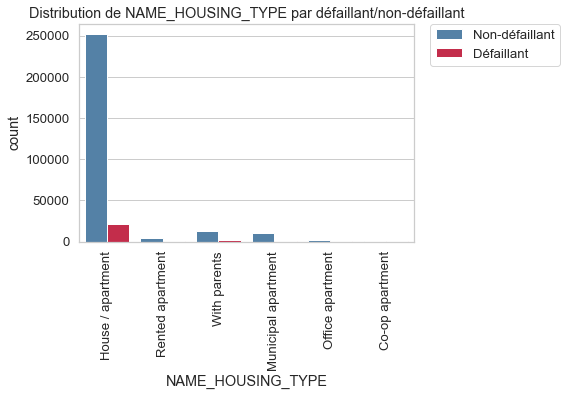

In [43]:
plot_barplot_comp_target(application_train,'NAME_HOUSING_TYPE', rotation=90)

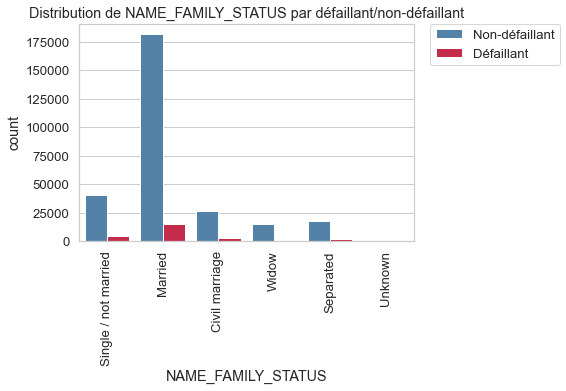

In [44]:
plot_barplot_comp_target(application_train,'NAME_FAMILY_STATUS',rotation=90)

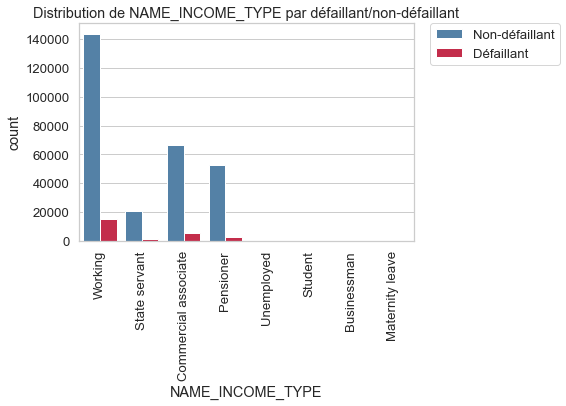

In [45]:
plot_barplot_comp_target(application_train, 'NAME_INCOME_TYPE', rotation=90)

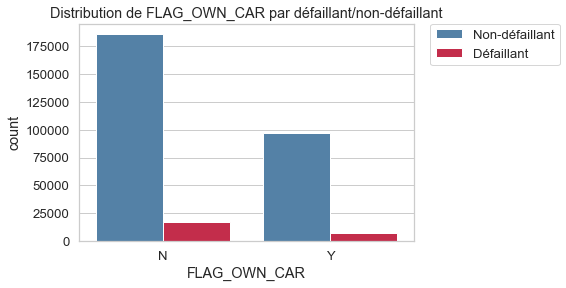

In [46]:
plot_barplot_comp_target(application_train,'FLAG_OWN_CAR')

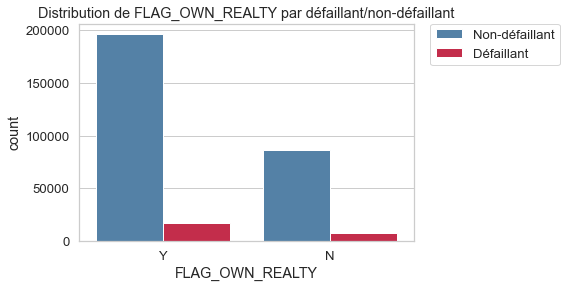

In [47]:
plot_barplot_comp_target(application_train,'FLAG_OWN_REALTY')

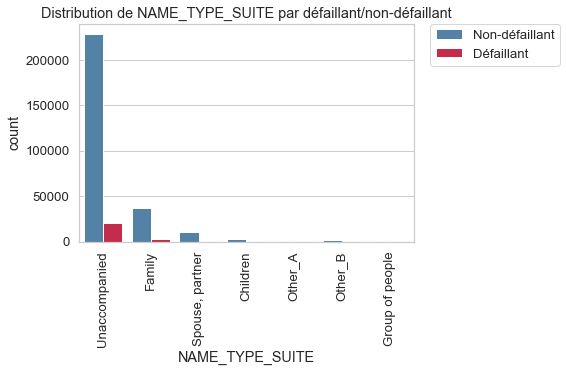

In [48]:
plot_barplot_comp_target(application_train,'NAME_TYPE_SUITE',rotation=90)

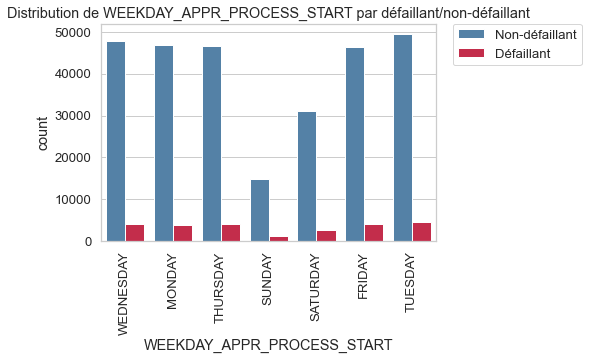

In [49]:
plot_barplot_comp_target(application_train,'WEEKDAY_APPR_PROCESS_START', rotation=90)

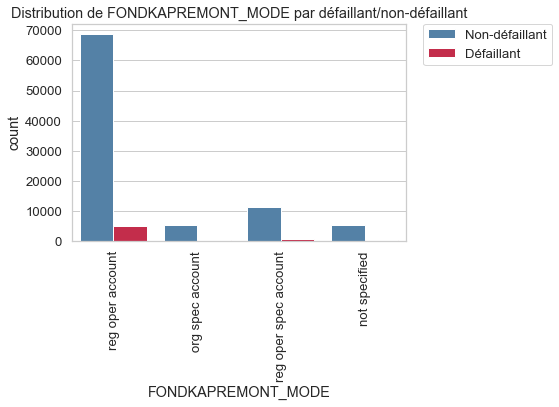

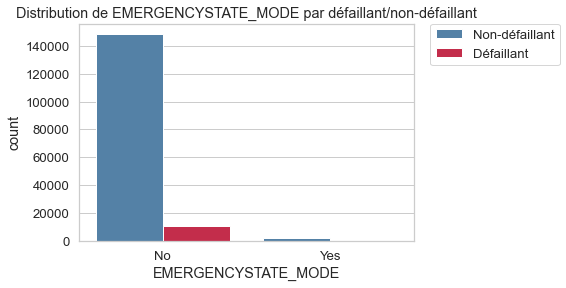

In [50]:
plot_barplot_comp_target(application_train,'FONDKAPREMONT_MODE', rotation=90)
plot_barplot_comp_target(application_train,'EMERGENCYSTATE_MODE')

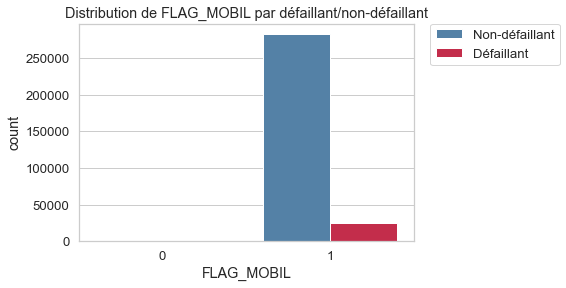

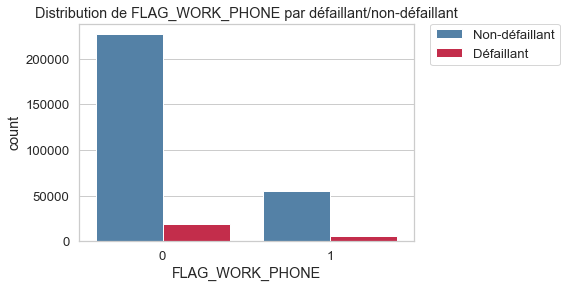

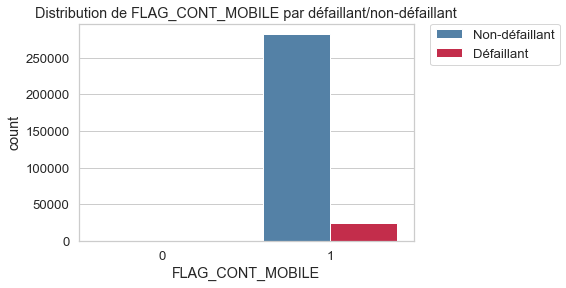

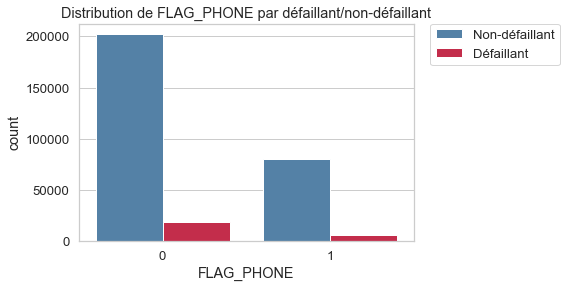

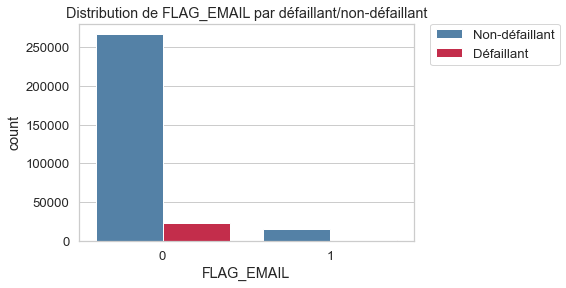

In [51]:
plot_barplot_comp_target(application_train,'FLAG_MOBIL')
plot_barplot_comp_target(application_train,'FLAG_WORK_PHONE') # tél de taf
plot_barplot_comp_target(application_train,'FLAG_CONT_MOBILE')# joignable?
plot_barplot_comp_target(application_train, 'FLAG_PHONE')# Fix de maison?
plot_barplot_comp_target(application_train, 'FLAG_EMAIL')# Email?



### VARIABLES QUANTI

In [52]:
# Liste des variables quantitatives
cols_num = application_train.select_dtypes(include=[np.number]).columns.to_list()
cols_num

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

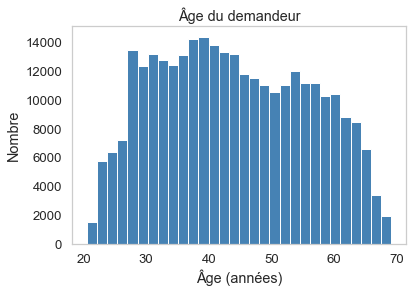

In [53]:
plt.hist(application_train['DAYS_BIRTH']*-1/365, color='SteelBlue',
         bins=30)
plt.title('Âge du demandeur')
plt.xlabel('Âge (années)')
plt.ylabel('Nombre')
plt.grid(False)
plt.show()

In [54]:
# Transformer l'âge en années à partir du nombre de jours
application_train['AGE_YEARS'] = \
    application_train['DAYS_BIRTH'] * -1 / 365

In [55]:
percentiles = list(range(0, 80, 25)) + list(range(90, 101, 2))

In [56]:
def plot_continuous_variables(data, column_name,
                              plots=['distplot', 'CDF', 'box', 'violin'], 
                              scale_limits=None, figsize=(20, 9),
                              histogram=True, log_scale=False,
                              palette=['SteelBlue', 'Crimson']):
    '''
    Function to plot continuous variables distribution
    Inputs:
        data: DataFrame
            The DataFrame from which to plot.
        column_name: str
            Column's name whose distribution is to be plotted.
        plots: list, default = ['distplot', 'CDF', box', 'violin']
            List of plots to plot for Continuous Variable.
        scale_limits: tuple (left, right), default = None
            To control the limits of values to be plotted in case of outliers.
        figsize: tuple, default = (20,8)
            Size of the figure to be plotted.
        histogram: bool, default = True
            Whether to plot histogram along with distplot or not.
        log_scale: bool, default = False
            Whether to use log-scale for variables with outlying points.
    '''
    data_to_plot = data.copy()
    if scale_limits:
        # taking only the data within the specified limits
        data_to_plot[column_name] = data[column_name][(
            data[column_name] > scale_limits[0]) & (data[column_name] < scale_limits[1])]

    number_of_subplots = len(plots)
    plt.figure(figsize=figsize)
    sns.set_style('whitegrid')

    for i, ele in enumerate(plots):
        plt.subplot(1, number_of_subplots, i + 1)
        plt.subplots_adjust(wspace=0.25)

        if ele == 'CDF':
            # making the percentile DataFrame for both positive and negative
            # Class Labels
            percentile_values_0 = data_to_plot[data_to_plot.TARGET == 0][[
                column_name]].dropna().sort_values(by=column_name)
            percentile_values_0['Percentile'] = [
                ele / (len(percentile_values_0) - 1) for ele in range(len(percentile_values_0))]

            percentile_values_1 = data_to_plot[data_to_plot.TARGET == 1][[
                column_name]].dropna().sort_values(by=column_name)
            percentile_values_1['Percentile'] = [
                ele / (len(percentile_values_1) - 1) for ele in range(len(percentile_values_1))]

            plt.plot(
                percentile_values_0[column_name],
                percentile_values_0['Percentile'],
                color='SteelBlue',
                label='Non-Défaillants')
            plt.plot(
                percentile_values_1[column_name],
                percentile_values_1['Percentile'],
                color='crimson',
                label='Défaillants')
            plt.xlabel(column_name, fontsize=16)
            plt.ylabel('Probabilité', fontsize=16)
            plt.title('CDF de {}'.format(column_name), fontsize=18)
            plt.legend(fontsize='medium')
            if log_scale:
                plt.xscale('log')
                plt.xlabel(column_name + ' - (log-scale)')

        if ele == 'distplot':
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 0].dropna(
            ), label='Non-Défaillants', hist=False, color='SteelBlue')
            sns.distplot(data_to_plot[column_name][data['TARGET'] == 1].dropna(
            ), label='Défaillants', hist=False, color='Crimson')
            plt.xlabel(column_name, fontsize=16)
            plt.ylabel('Probability Density', fontsize=16)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)
            plt.legend(fontsize=18)
            plt.title("Dist-Plot de {}".format(column_name), fontsize=18)
            if log_scale:
                plt.xscale('log')
                plt.xlabel(f'{column_name} (log scale)', fontsize=16)

        if ele == 'violin':
            sns.violinplot(x='TARGET', y=column_name, data=data_to_plot, palette=palette)
            plt.title("Violin-Plot de {}".format(column_name), fontsize=18)
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)')

        if ele == 'box':
            sns.boxplot(x='TARGET', y=column_name, data=data_to_plot, palette=palette)
            plt.title("Box-Plot de {}".format(column_name), fontsize=18)
            if log_scale:
                plt.yscale('log')
                plt.ylabel(f'{column_name} (log Scale)', fontsize=16)
            plt.xlabel('TARGET', fontsize=16)
            plt.ylabel(f'{column_name}', fontsize=16)
            plt.xticks(fontsize=16)
            plt.yticks(fontsize=16)

    plt.show()

In [57]:
for i in percentiles:
    print(f'Pecentile {i} = {np.percentile(application_train.AGE_YEARS.dropna(), i)}')
    

Pecentile 0 = 20.517808219178082
Pecentile 25 = 34.00821917808219
Pecentile 50 = 43.15068493150685
Pecentile 75 = 53.92328767123288
Pecentile 90 = 60.76986301369863
Pecentile 92 = 61.87397260273973
Pecentile 94 = 62.99452054794521
Pecentile 96 = 64.1945205479452
Pecentile 98 = 65.6027397260274
Pecentile 100 = 69.12054794520547


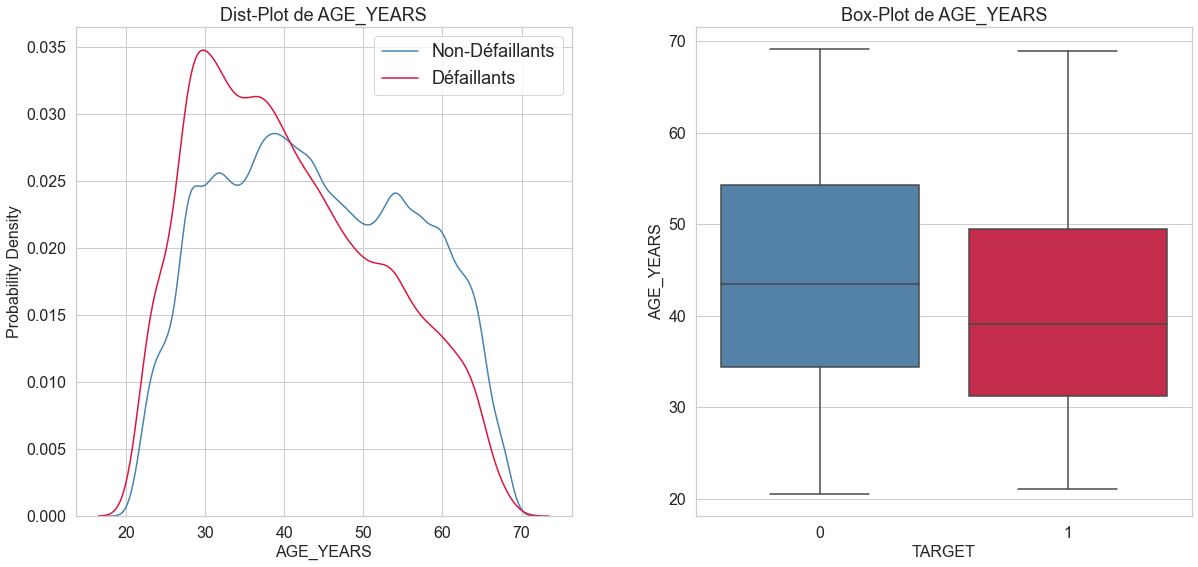

In [58]:
plot_continuous_variables(application_train, 'AGE_YEARS',plots=['distplot', 'box'])

In [59]:
# Transformer en années à partir du nombre de jours
application_train['YEARS_EMPLOYED'] = \
    application_train['DAYS_EMPLOYED'] * -1 / 365

In [60]:
for i in percentiles:
    print(f'Pecentile {i} = {np.percentile(application_train.YEARS_EMPLOYED.dropna(), i)}')

Pecentile 0 = -1000.6657534246575
Pecentile 25 = 0.7917808219178082
Pecentile 50 = 3.3232876712328765
Pecentile 75 = 7.561643835616438
Pecentile 90 = 13.372602739726027
Pecentile 92 = 14.726027397260275
Pecentile 94 = 16.958904109589042
Pecentile 96 = 20.134246575342466
Pecentile 98 = 25.15068493150685
Pecentile 100 = 49.07397260273972


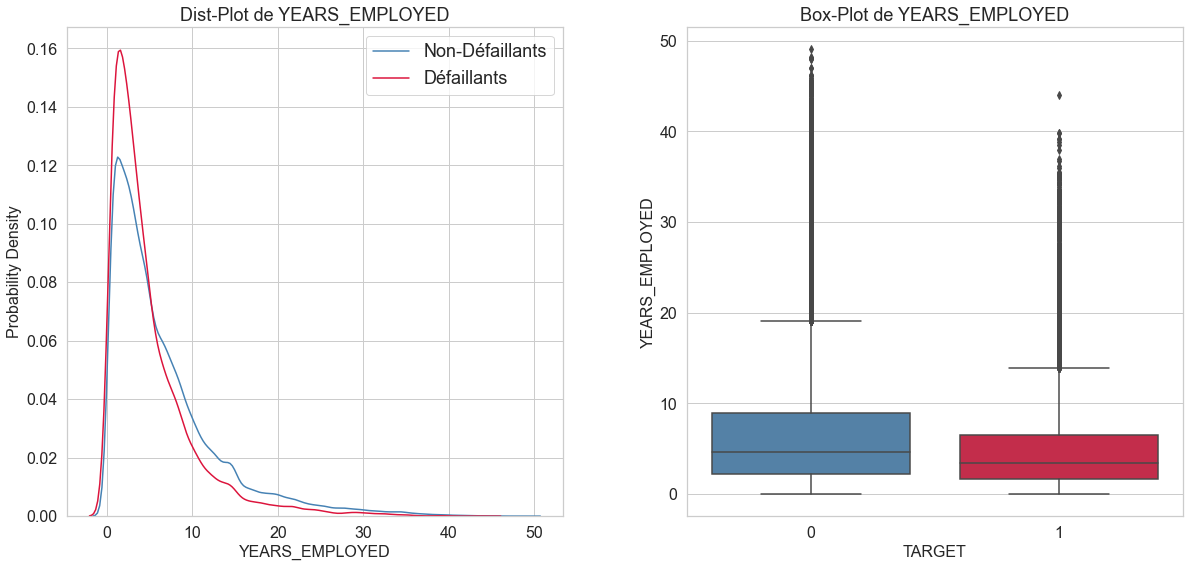

In [61]:
plot_continuous_variables(application_train, 'YEARS_EMPLOYED',plots=['distplot', 'box'], scale_limits=[0, 70])

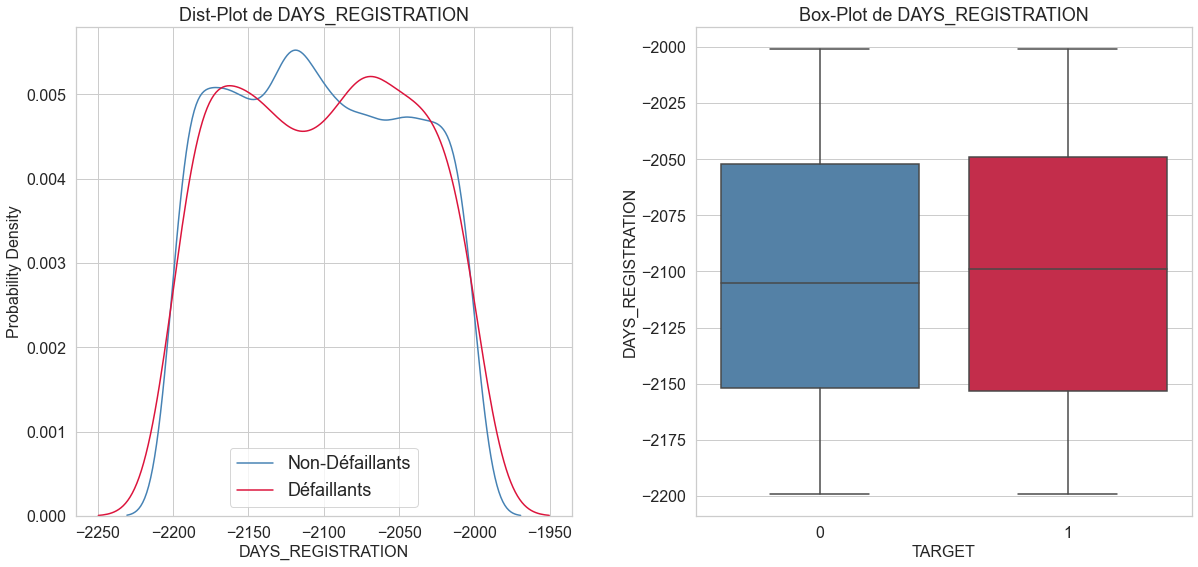

In [62]:
# nombre de jours depuis la dernière modification
plot_continuous_variables(application_train,'DAYS_REGISTRATION', plots=['distplot', 'box'],scale_limits=[-2200, -2000]) 


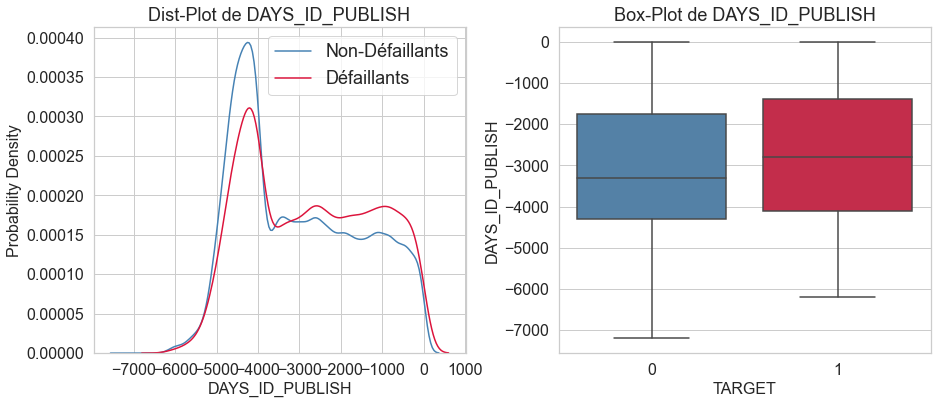

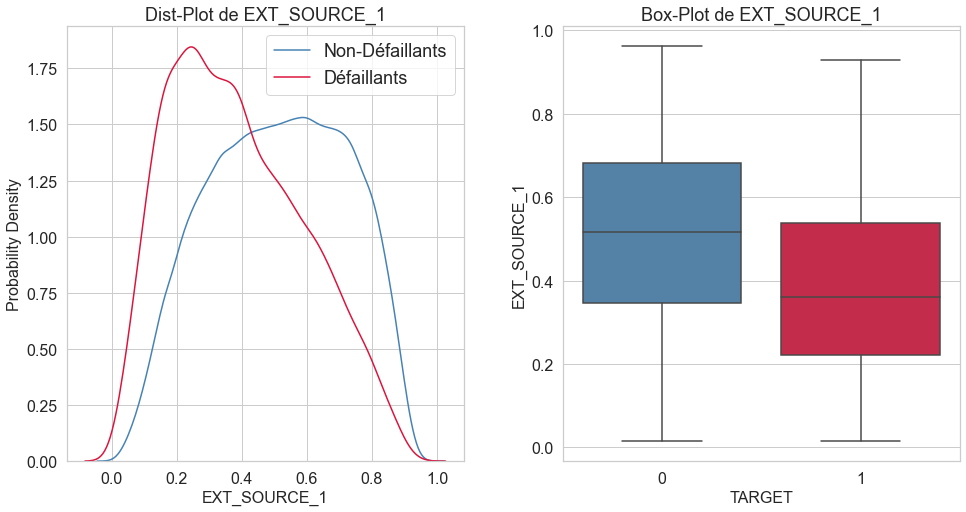

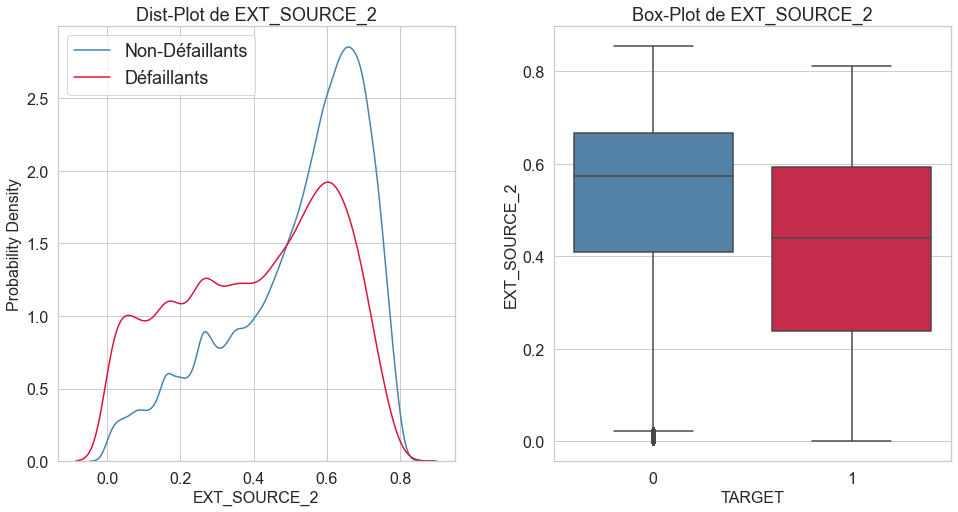

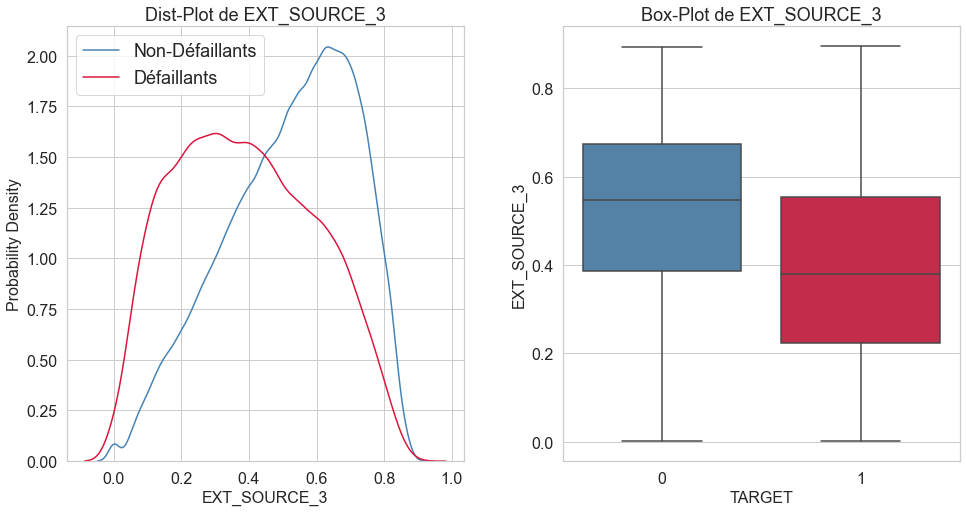

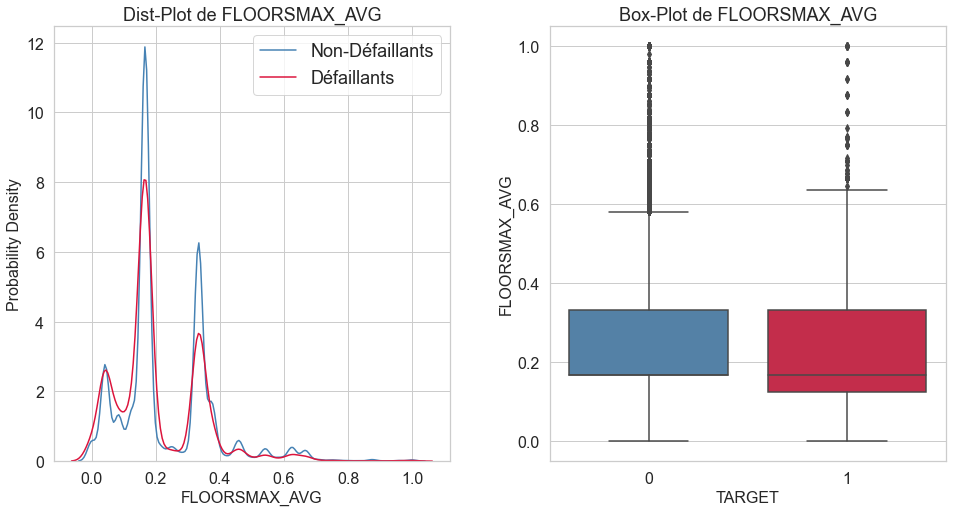

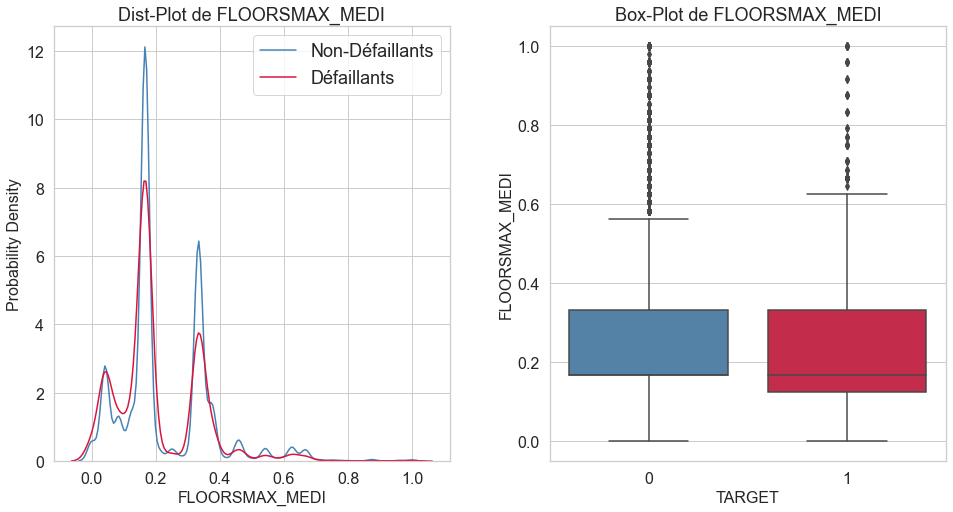

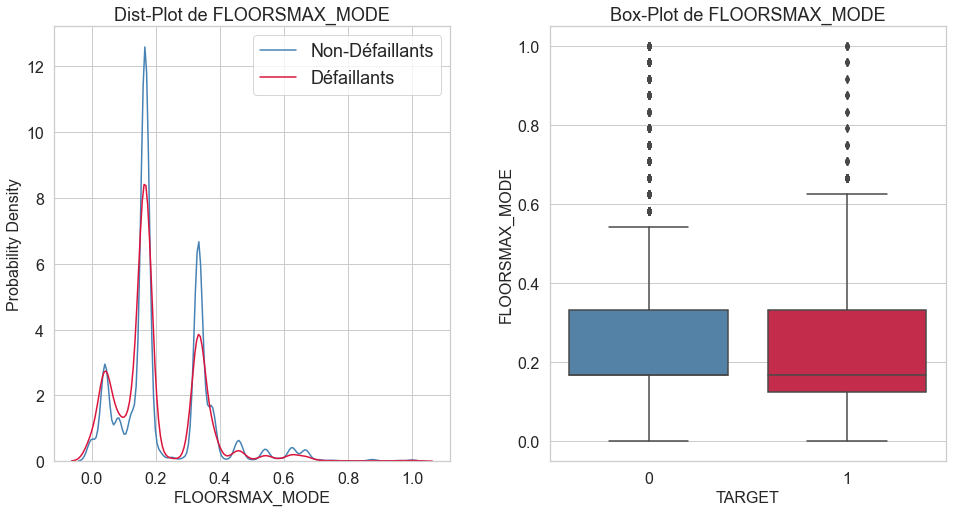

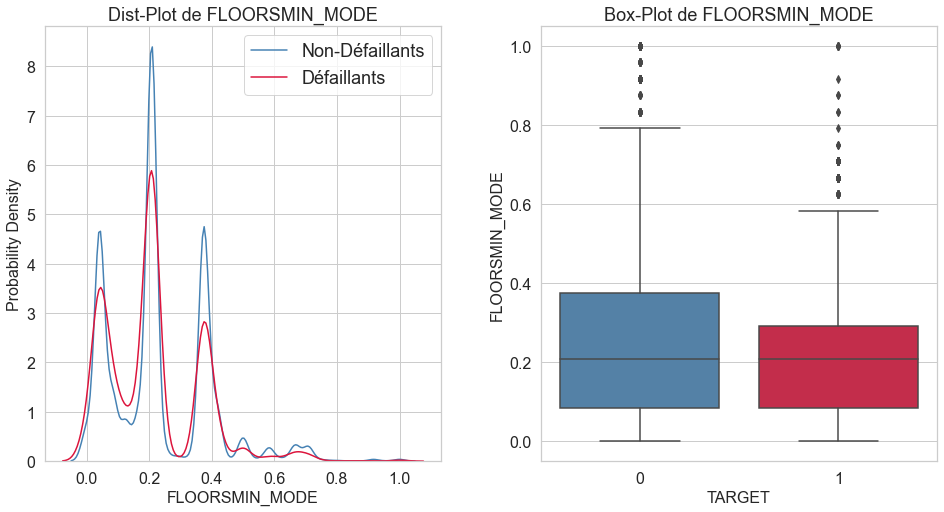

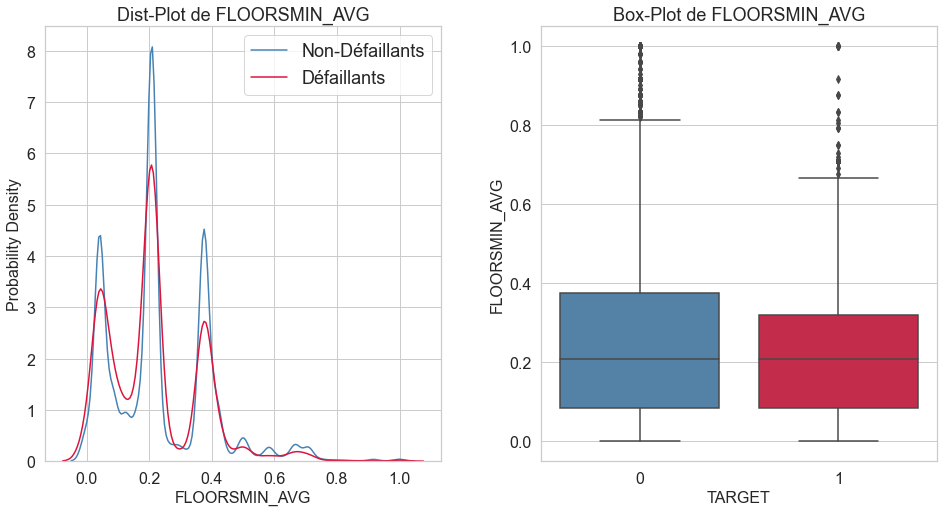

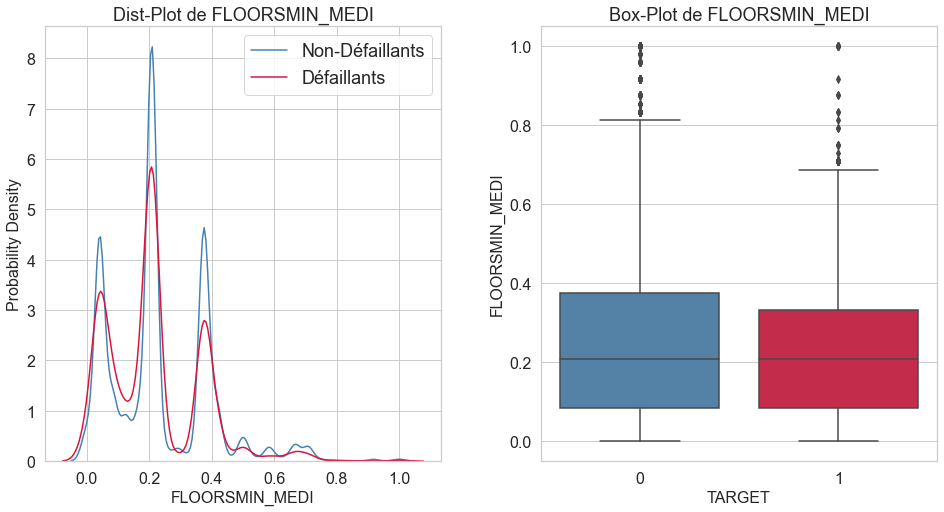

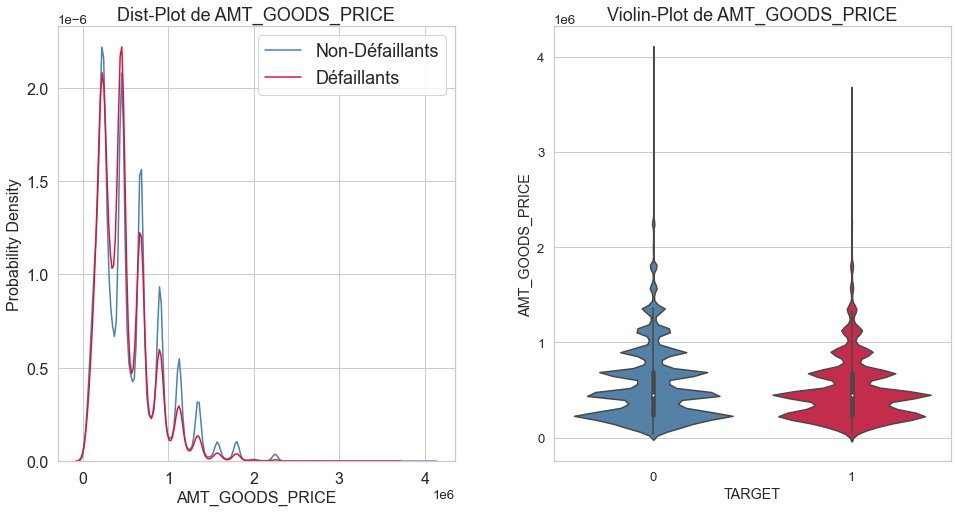

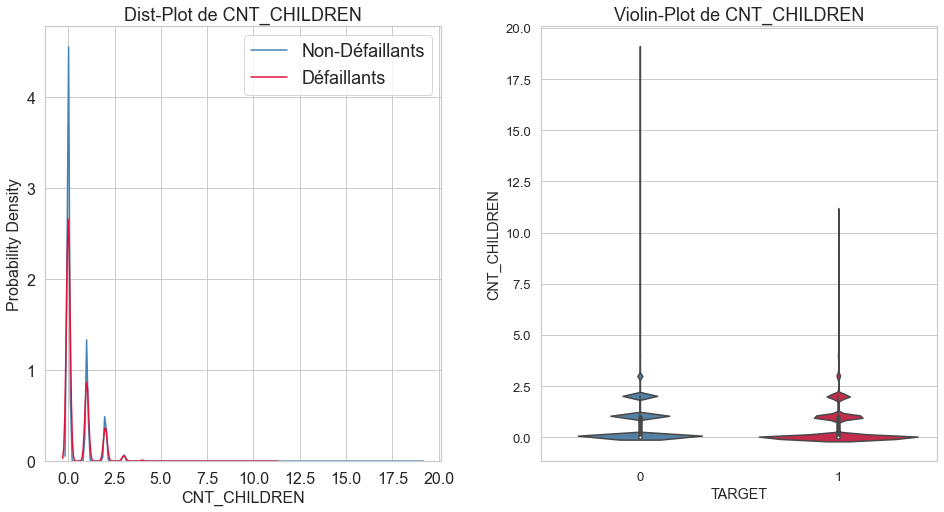

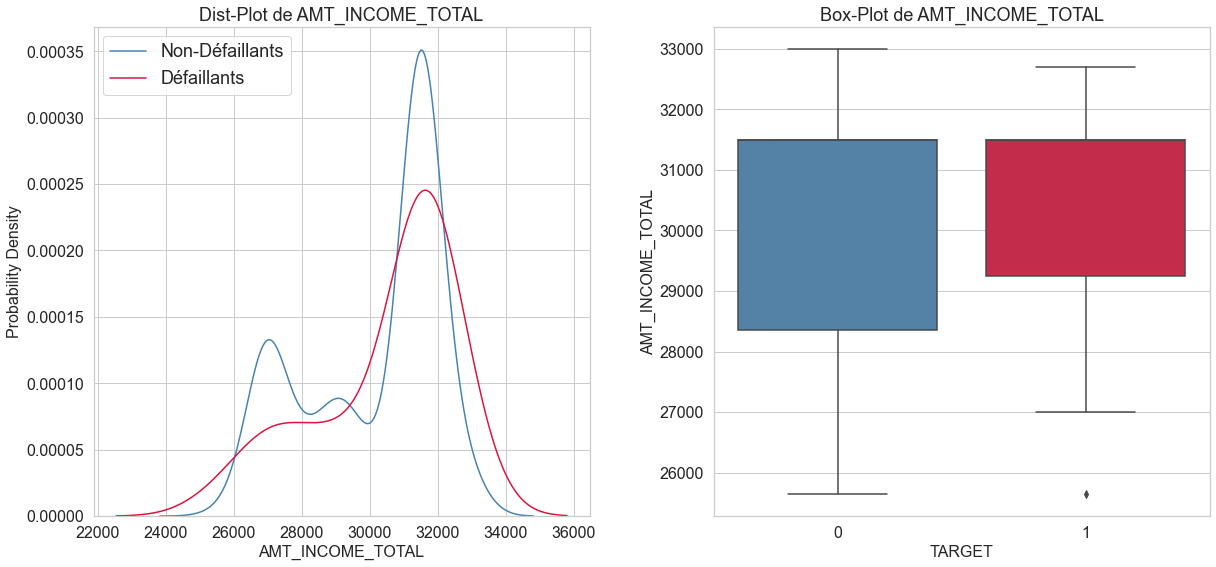

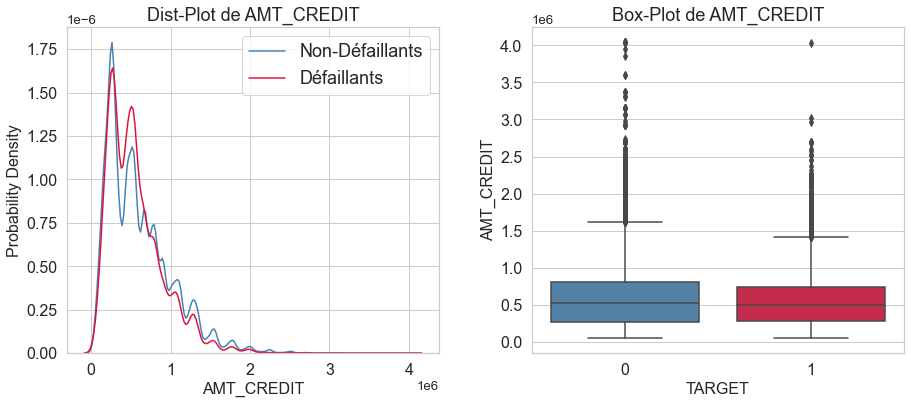

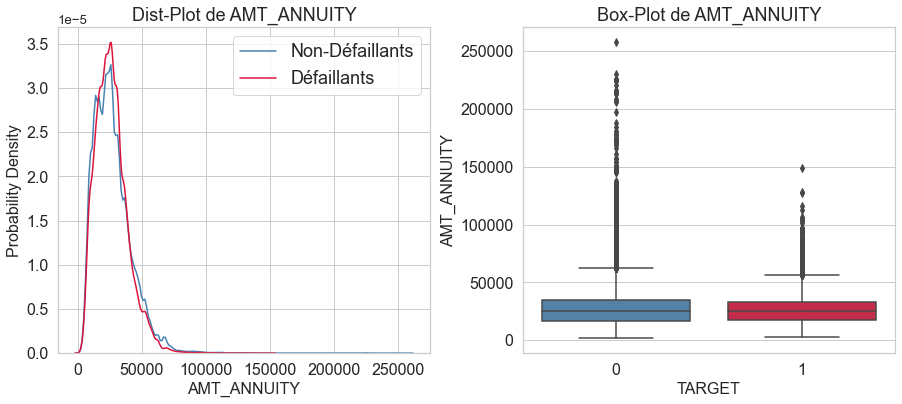

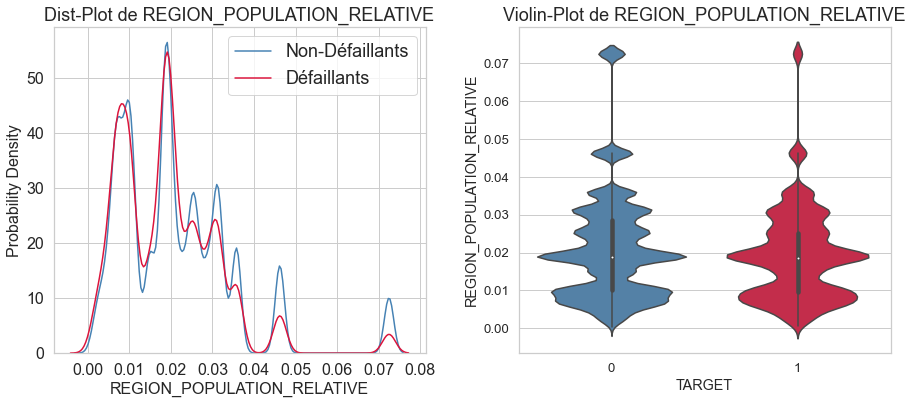

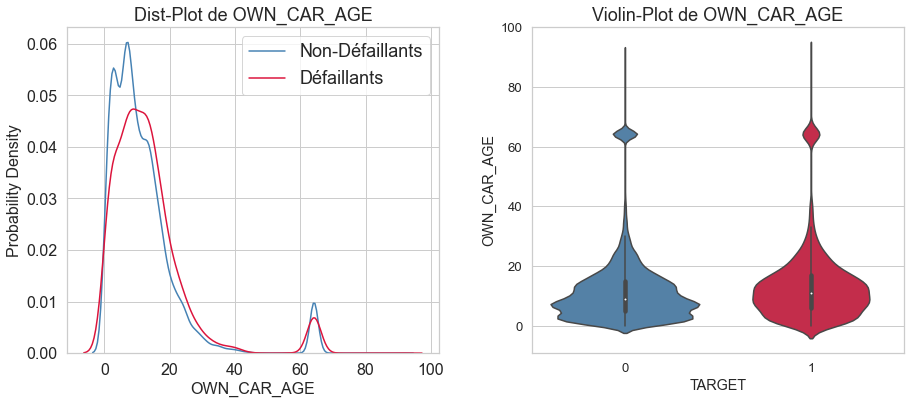

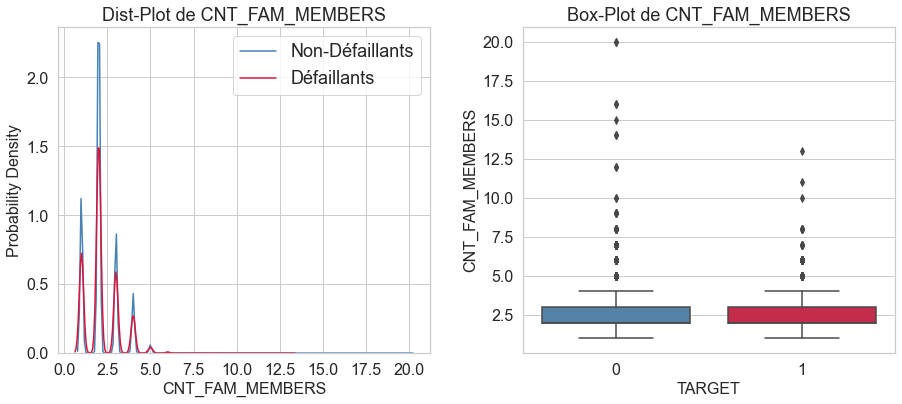

In [63]:
# combien de jours, à partir du jour de l'enregistrement, le demandeur a changé le document             
plot_continuous_variables(application_train, 'DAYS_ID_PUBLISH',plots=['distplot', 'box'],figsize=(15, 6))
# ?
plot_continuous_variables(application_train, 'EXT_SOURCE_1', plots=['distplot', 'box'],figsize=(16, 8))
plot_continuous_variables(application_train, 'EXT_SOURCE_2', plots=['distplot', 'box'],figsize=(16, 8))
plot_continuous_variables(application_train, 'EXT_SOURCE_3', plots=['distplot', 'box'],figsize=(16, 8))
# Nbre max d'étage
plot_continuous_variables(application_train, 'FLOORSMAX_AVG', plots=['distplot', 'box'],figsize=(16, 8))
plot_continuous_variables(application_train, 'FLOORSMAX_MEDI', plots=['distplot', 'box'],figsize=(16, 8))
plot_continuous_variables(application_train, 'FLOORSMAX_MODE', plots=['distplot', 'box'],figsize=(16, 8))
plot_continuous_variables(application_train, 'FLOORSMIN_MODE', plots=['distplot', 'box'],figsize=(16, 8))
plot_continuous_variables(application_train, 'FLOORSMIN_AVG', plots=['distplot', 'box'],figsize=(16, 8))
plot_continuous_variables(application_train, 'FLOORSMIN_MEDI', plots=['distplot', 'box'],figsize=(16, 8))
# prix du bien sur demande précedente
plot_continuous_variables(application_train, 'AMT_GOODS_PRICE', plots=['distplot', 'violin'],figsize=(16, 8))
# nbre enfants
plot_continuous_variables(application_train, 'CNT_CHILDREN', plots=['distplot', 'violin'],figsize=(16, 8))
# revenu demandeur
plot_continuous_variables(application_train, 'AMT_INCOME_TOTAL', plots=['distplot', 'box'], scale_limits=[0, 33e3])
# montant credit
plot_continuous_variables(application_train, 'AMT_CREDIT',plots=['distplot', 'box'],figsize=(15, 6))
#annuité
plot_continuous_variables(application_train, 'AMT_ANNUITY',plots=['distplot', 'box'], figsize=(15, 6)) 
# densité ville d'habitation du demandeur 
plot_continuous_variables(application_train, 'REGION_POPULATION_RELATIVE', plots=['distplot', 'violin'], figsize=(15, 6))
# age voiture demandeur
plot_continuous_variables(application_train, 'OWN_CAR_AGE', plots=['distplot', 'violin'],figsize=(15, 6))
# composition famille
plot_continuous_variables(application_train,'CNT_FAM_MEMBERS', plots=['distplot', 'box'], figsize=(15, 6))
                          

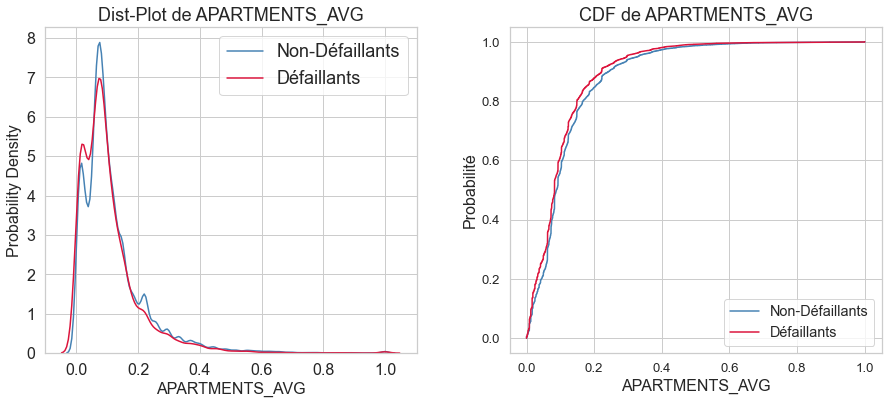

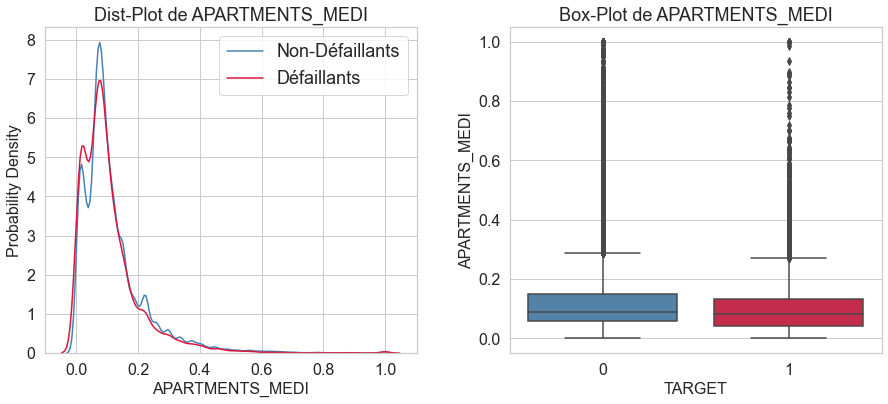

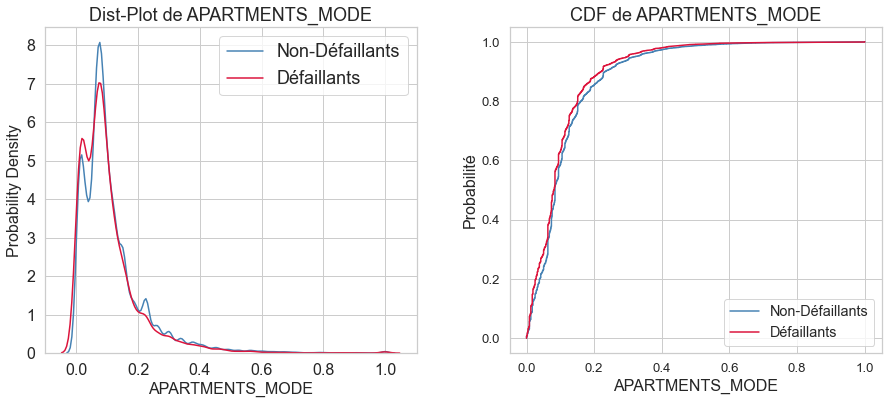

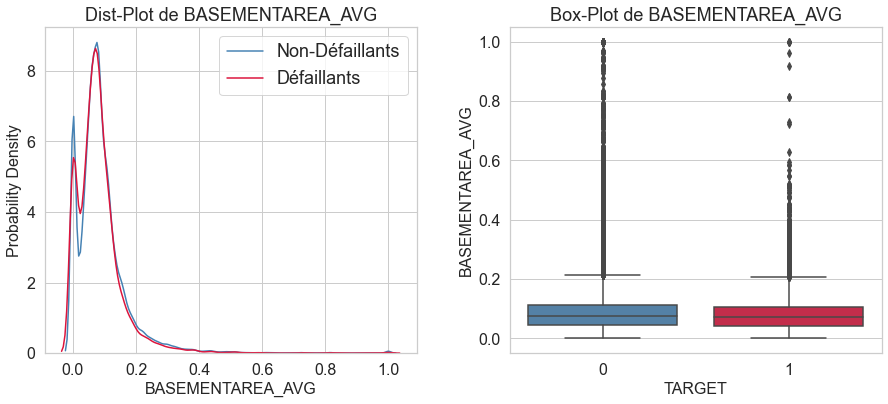

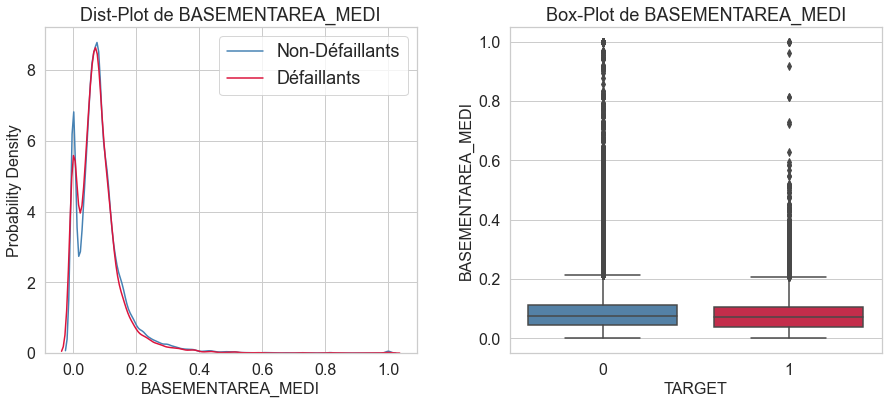

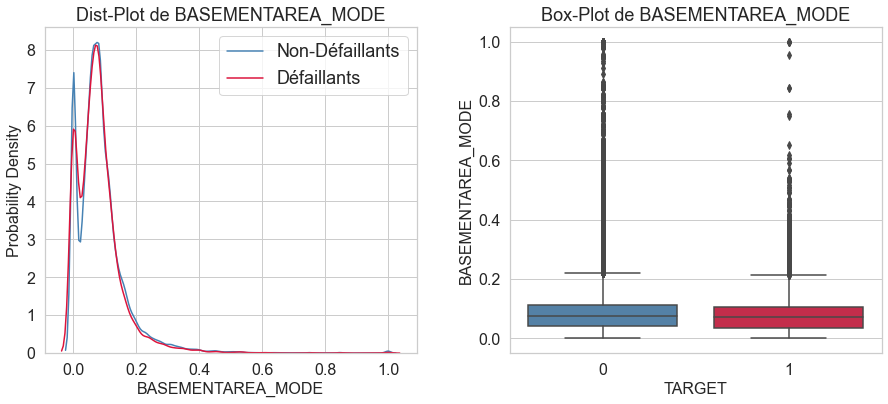

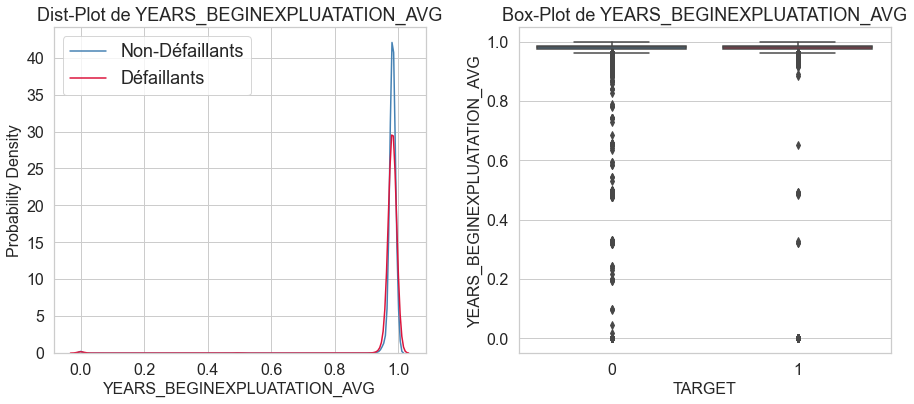

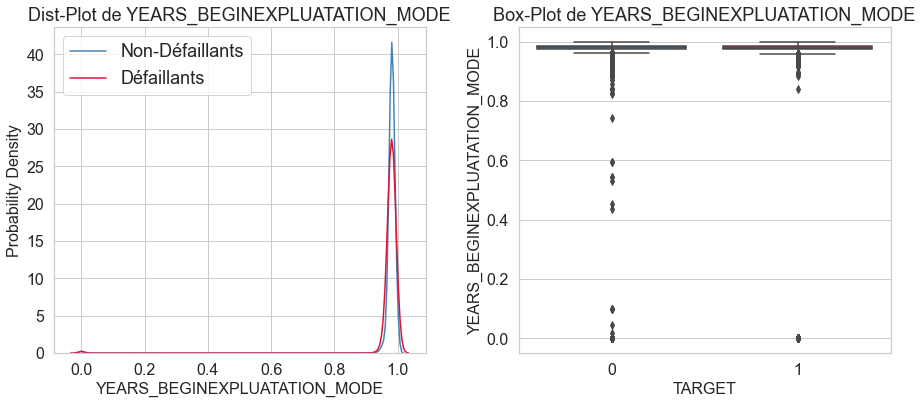

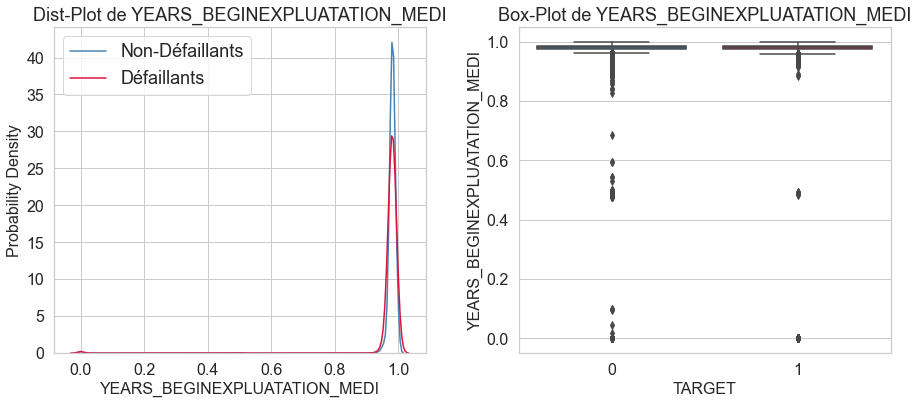

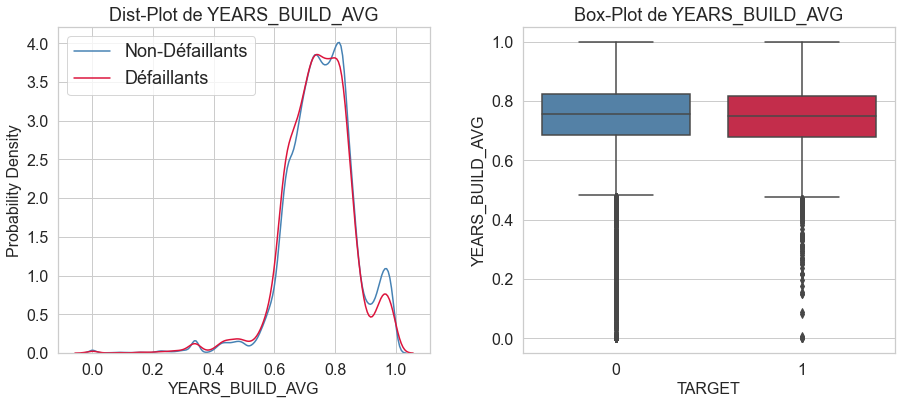

In [64]:
# taille appartement
plot_continuous_variables(application_train, 'APARTMENTS_AVG', plots=['distplot', 'CDF'],figsize=(15, 6))
plot_continuous_variables(application_train, 'APARTMENTS_MEDI', plots=['distplot', 'box'],figsize=(15, 6))
plot_continuous_variables(application_train, 'APARTMENTS_MODE', plots=['distplot', 'CDF'],figsize=(15, 6))
# Taille immeuble
plot_continuous_variables(application_train, 'BASEMENTAREA_AVG', plots=['distplot', 'box'],figsize=(15, 6))
plot_continuous_variables(application_train, 'BASEMENTAREA_MEDI', plots=['distplot', 'box'],figsize=(15, 6))
plot_continuous_variables(application_train, 'BASEMENTAREA_MODE', plots=['distplot', 'box'],figsize=(15, 6))
plot_continuous_variables(application_train, 'YEARS_BEGINEXPLUATATION_AVG', plots=['distplot', 'box'],figsize=(15, 6))
plot_continuous_variables(application_train, 'YEARS_BEGINEXPLUATATION_MODE', plots=['distplot', 'box'],figsize=(15, 6))
plot_continuous_variables(application_train, 'YEARS_BEGINEXPLUATATION_MEDI', plots=['distplot', 'box'],figsize=(15, 6))
plot_continuous_variables(application_train, 'YEARS_BUILD_AVG', plots=['distplot', 'box'],figsize=(15, 6))


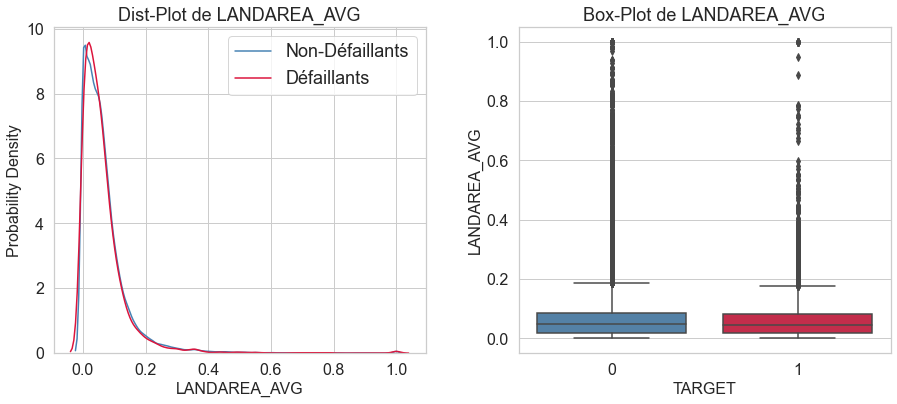

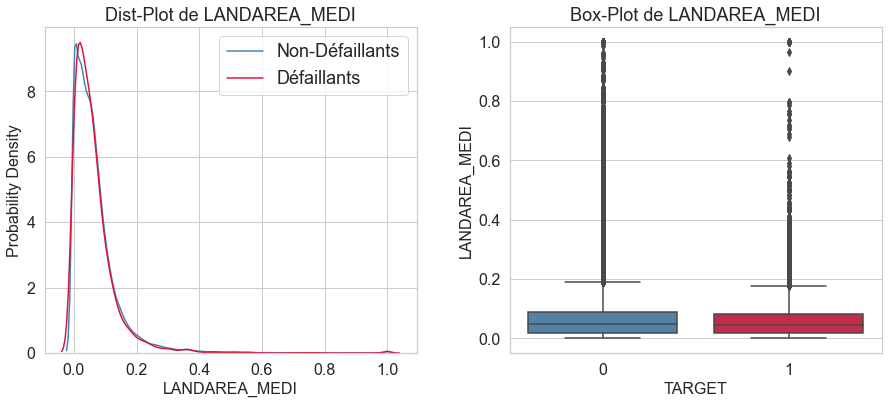

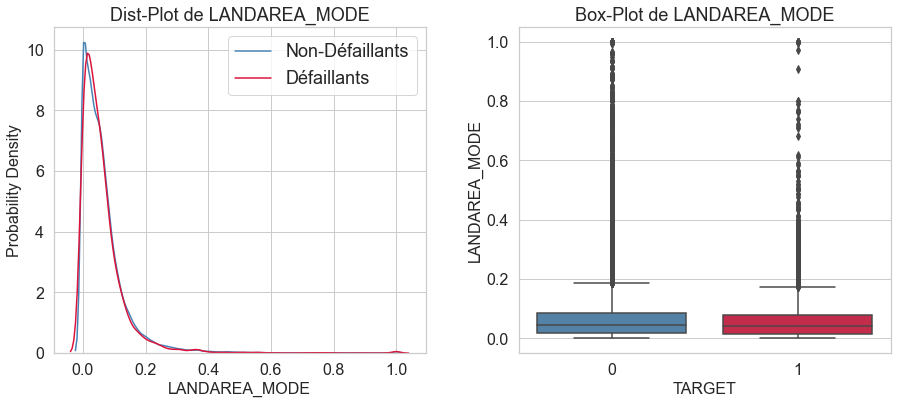

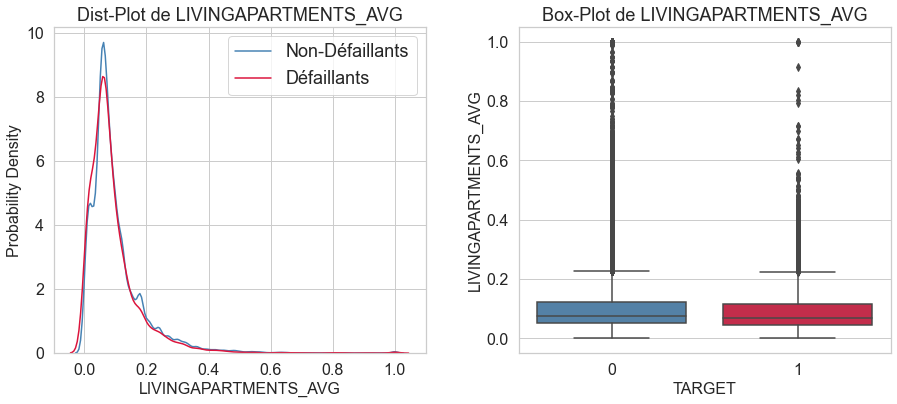

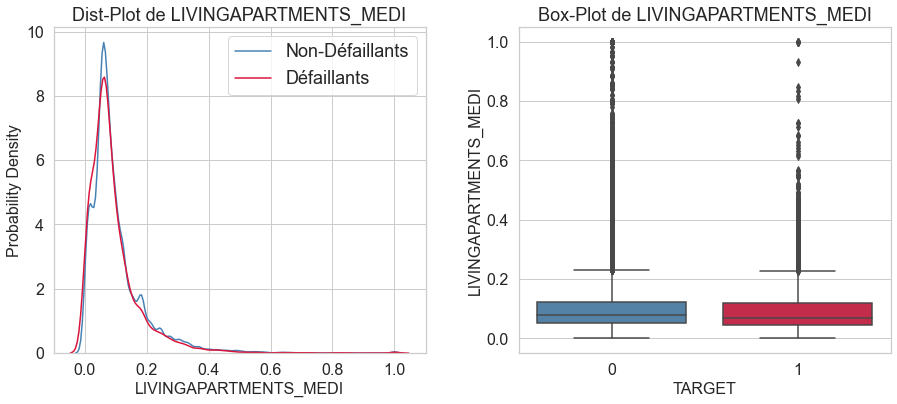

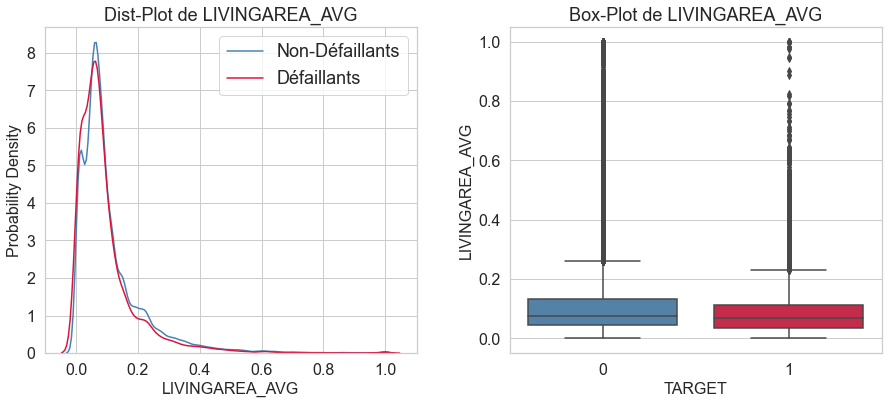

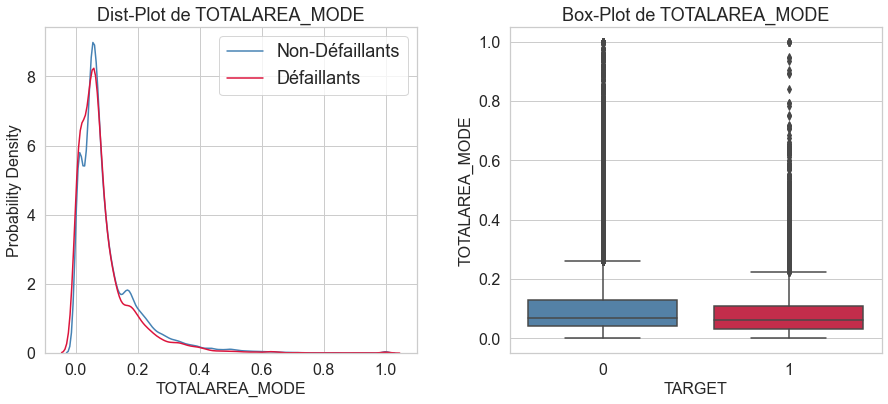

In [65]:
# Info sur la surface...
plot_continuous_variables(application_train,'LANDAREA_AVG',plots=['distplot', 'box'],figsize=(15, 6))
plot_continuous_variables(application_train,'LANDAREA_MEDI',plots=['distplot', 'box'],figsize=(15, 6))
plot_continuous_variables(application_train,'LANDAREA_MODE',plots=['distplot', 'box'],figsize=(15, 6))
plot_continuous_variables(application_train,'LIVINGAPARTMENTS_AVG',plots=['distplot', 'box'],figsize=(15, 6))
plot_continuous_variables(application_train,'LIVINGAPARTMENTS_MEDI',plots=['distplot', 'box'],figsize=(15, 6))
plot_continuous_variables(application_train,'LIVINGAREA_AVG',plots=['distplot', 'box'],figsize=(15, 6))
plot_continuous_variables(application_train,'TOTALAREA_MODE',plots=['distplot', 'box'],figsize=(15, 6))

### CORRELATIONS ENTRE VARIABLES CATEGORIELLES

In [66]:
categorical_columns = ['TARGET', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
                       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
                       'FLAG_EMAIL', 'REGION_RATING_CLIENT',
                       'REGION_RATING_CLIENT_W_CITY',
                       'REG_REGION_NOT_LIVE_REGION',
                       'REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
                       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'] \
    + ['FLAG_DOCUMENT_' + str(i) for i in range(2, 22)] \
    + application_train.dtypes[application_train.dtypes == 'object'] .index.tolist()

In [67]:
!pip install phik

In [68]:
import phik

In [69]:
def plot_phik_matrix(data, categorical_columns, figsize=(20, 20),
                     mask_upper=True, tight_layout=True, linewidth=0.1,
                     fontsize=10, cmap='Blues', show_target_top_corr=True,
                     target_top_columns=10):
    '''
    Function to Phi_k matrix for categorical features
    Nous allons tracer une carte thermique des valeurs du coefficient de
    corrélation Phi-K entre les 2 variables.
    Le coefficient Phi-K est similaire au coefficient de corrélation sauf
    qu'il peut être utilisé avec une paire de caractéristiques catégorielles
    pour vérifier si une varaible montre une sorte d'association avec l'autre
    variable catégorielle. Sa valeur maximale peut être de 1, ce qui indique
    une association maximale entre deux variables catégorielles.
    Inputs:
        data: DataFrame
            The DataFrame from which to build correlation matrix
        categorical_columns: list
            List of categorical columns whose PhiK values are to be plotted
        figsize: tuple, default = (25,23)
            Size of the figure to be plotted
        mask_upper: bool, default = True
            Whether to plot only the lower triangle of heatmap or plot full.
        tight_layout: bool, default = True
            Whether to keep tight layout or not
        linewidth: float/int, default = 0.1
            The linewidth to use for heatmap
        fontsize: int, default = 10
            The font size for the X and Y tick labels
        cmap: str, default = 'Blues'
            The colormap to be used for heatmap
        show_target_top_corr: bool, default = True
            Whether to show top/highly correlated features with Target.
        target_top_columns: int, default = 10
            The number of top correlated features with target to display
    '''
    # first fetching only the categorical features
    data_for_phik = data[categorical_columns].astype('object')
    phik_matrix = data_for_phik.phik_matrix()

    print('-' * 79)

    if mask_upper:
        mask_array = np.ones(phik_matrix.shape)
        mask_array = np.triu(mask_array)
    else:
        mask_array = np.zeros(phik_matrix.shape)

    plt.figure(figsize=figsize, tight_layout=tight_layout)
    sns.heatmap(
        phik_matrix,
        annot=False,
        mask=mask_array,
        linewidth=linewidth,
        cmap=cmap)
    plt.xticks(rotation=90, fontsize=fontsize)
    plt.yticks(rotation=0, fontsize=fontsize)
    plt.title("Phi-K Correlation Heatmap des variables catégorielles",
              fontsize=fontsize+4)
    plt.show()
    
    print("-" * 79)

    if show_target_top_corr:
        # Seeing the top columns with highest correlation with the target
        # variable in application_train
        print("Les catégories présentant les valeurs les plus élevées de la corrélation Phi-K avec la variable cible sont les suivantes :")
        phik_df = pd.DataFrame(
            {'Variable': phik_matrix.TARGET.index[1:], 'Phik-Correlation': phik_matrix.TARGET.values[1:]})
        phik_df = phik_df.sort_values(by='Phik-Correlation', ascending=False)
        display(phik_df.head(target_top_columns).style.hide_index())
        print("-" * 79)

-------------------------------------------------------------------------------


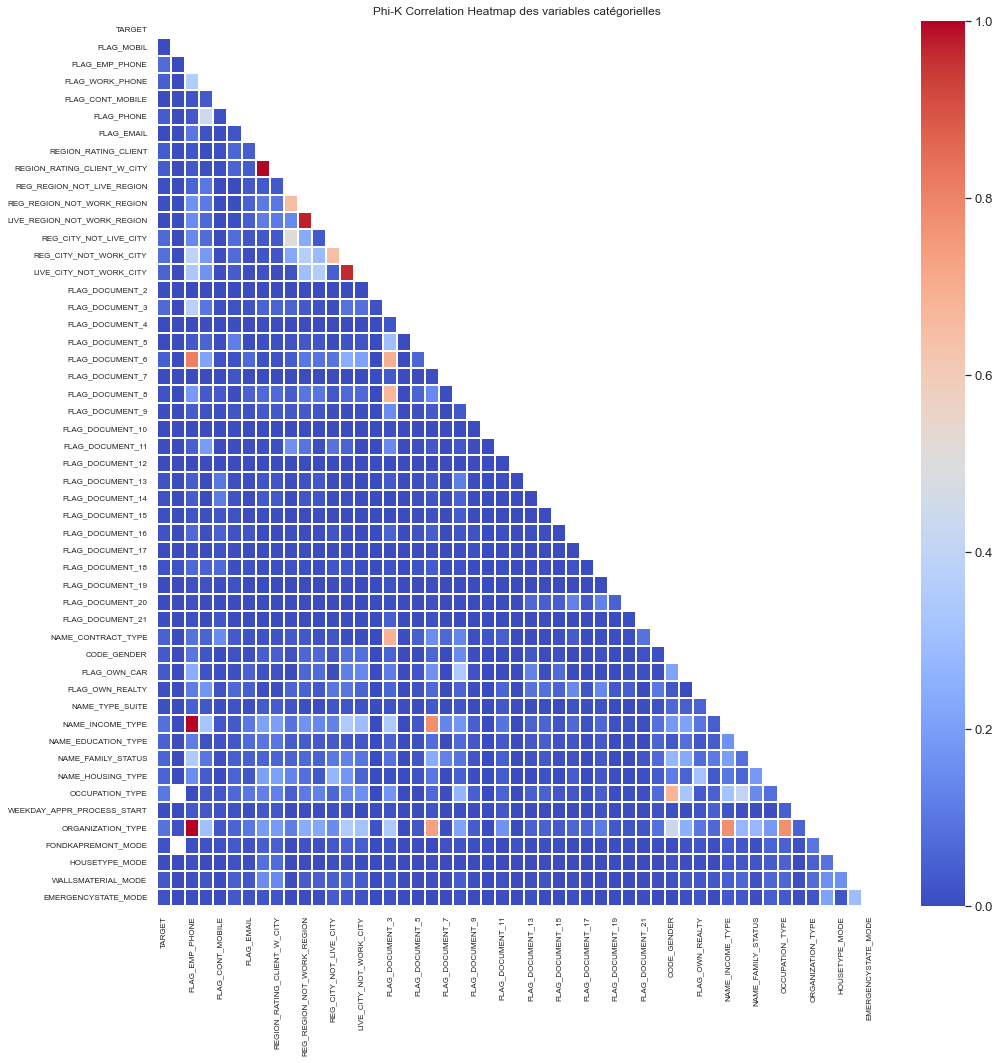

-------------------------------------------------------------------------------
Les catégories présentant les valeurs les plus élevées de la corrélation Phi-K avec la variable cible sont les suivantes :


-------------------------------------------------------------------------------


In [70]:
plot_phik_matrix(application_train, categorical_columns,figsize=(15, 15), fontsize=8, cmap='coolwarm')

### CORRELATIONS ENTRE LES VARIABLES QUANTITATIVES 

In [71]:
columns_to_drop = ['SK_ID_CURR'] + list(set(categorical_columns) - set(['TARGET']))

In [72]:
class correlation_matrix:
    '''
    Class to plot heatmap of Correlation Matrix and print Top Correlated Features with Target.
    Contains three methods:
        1. init method
        2. plot_correlation_matrix method
        3. target_top_corr method
    '''

    def __init__(
            self,
            data,
            columns_to_drop,
            figsize=(
                25,
                23),
            mask_upper=True,
            tight_layout=True,
            linewidth=0.1,
            fontsize=10,
            cmap='Blues'):
        '''
        Function to initialize the class members.
        Inputs:
            data: DataFrame
                The DataFrame from which to build correlation matrix
            columns_to_drop: list
                Columns which have to be dropped while building the correlation matrix (for example the Loan ID)
            figsize: tuple, default = (25,23)
                Size of the figure to be plotted
            mask_upper: bool, default = True
                Whether to plot only the lower triangle of heatmap or plot full.
            tight_layout: bool, default = True
                Whether to keep tight layout or not
            linewidth: float/int, default = 0.1
                The linewidth to use for heatmap
            fontsize: int, default = 10
                The font size for the X and Y tick labels
            cmap: str, default = 'Blues'
                The colormap to be used for heatmap
        Returns:
            None
        '''

        self.data = data
        self.columns_to_drop = columns_to_drop
        self.figsize = figsize
        self.mask_upper = mask_upper
        self.tight_layout = tight_layout
        self.linewidth = linewidth
        self.fontsize = fontsize
        self.cmap = cmap

    def plot_correlation_matrix(self):
        '''
        Function to plot the Correlation Matrix Heatmap
        Inputs:
            self
        Returns:
            None
        '''

        # print('-' * 79)
        # building the correlation dataframe
        self.corr_data = self.data.drop(
            self.columns_to_drop + ['TARGET'], axis=1).corr()

        if self.mask_upper:
            # masking the heatmap to show only lower triangle. This is to save
            # the RAM.
            mask_array = np.ones(self.corr_data.shape)
            mask_array = np.triu(mask_array)
        else:
            mask_array = np.zeros(self.corr_data.shape)

        plt.figure(figsize=self.figsize, tight_layout=self.tight_layout)
        sns.heatmap(
            self.corr_data,
            annot=False,
            mask=mask_array,
            linewidth=self.linewidth,
            cmap=self.cmap)
        plt.xticks(rotation=90, fontsize=self.fontsize)
        plt.yticks(fontsize=self.fontsize)
        plt.title("Heatmap de corrélation des variables numériques", fontsize=20)
        plt.show()
        # print("-" * 100)

    def target_top_corr(self, target_top_columns=10):
        '''
        Function to return the Top Correlated features with the Target
        Inputs:
            self
            target_top_columns: int, default = 10
                The number of top correlated features with target to display
        Returns:
            Top correlated features DataFrame.
        '''

        phik_target_arr = np.zeros(self.corr_data.shape[1])
        # calculating the Phik-Correlation with Target
        for index, column in enumerate(self.corr_data.columns):
            phik_target_arr[index] = self.data[[
                'TARGET', column]].phik_matrix().iloc[0, 1]
        # getting the top correlated columns and their values
        top_corr_target_df = pd.DataFrame(
            {'Column Name': self.corr_data.columns, 'Phik-Correlation': phik_target_arr})
        top_corr_target_df = top_corr_target_df.sort_values(
            by='Phik-Correlation', ascending=False)

        return top_corr_target_df.iloc[:target_top_columns]


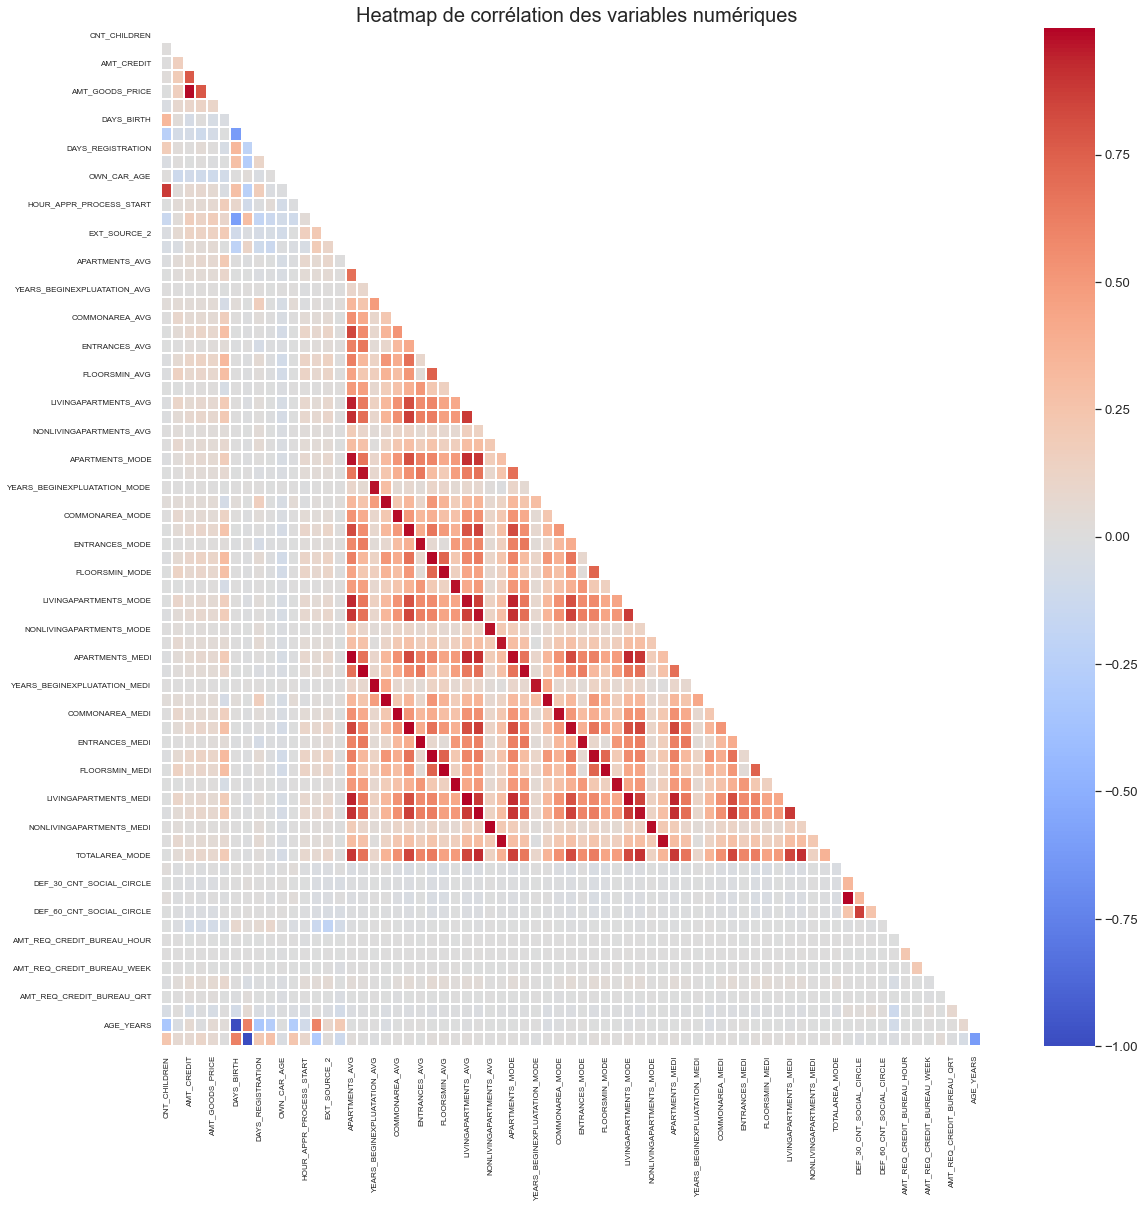

In [73]:
corr_mat =correlation_matrix(application_train, columns_to_drop, figsize=(17, 17), fontsize=8, cmap='coolwarm')
corr_mat.plot_correlation_matrix()

In [74]:
# Voir les colonnes supérieures avec la plus haute corrélation phik avec
# la variable cible dans la table application_train
top_corr_target_df = corr_mat.target_top_corr()
print("-" * 79)
titre1 = 'Les variables ayant les valeurs les plus élevées de Phik'
print(titre1 + '-corrélation avec la variable cible sont les suivantes :')
display(top_corr_target_df.style.hide_index())
print("-"*79)

interval columns not set, guessing: ['TARGET', 'CNT_CHILDREN']
interval columns not set, guessing: ['TARGET', 'AMT_INCOME_TOTAL']
interval columns not set, guessing: ['TARGET', 'AMT_CREDIT']
interval columns not set, guessing: ['TARGET', 'AMT_ANNUITY']
interval columns not set, guessing: ['TARGET', 'AMT_GOODS_PRICE']
interval columns not set, guessing: ['TARGET', 'REGION_POPULATION_RELATIVE']
interval columns not set, guessing: ['TARGET', 'DAYS_BIRTH']
interval columns not set, guessing: ['TARGET', 'DAYS_EMPLOYED']
interval columns not set, guessing: ['TARGET', 'DAYS_REGISTRATION']
interval columns not set, guessing: ['TARGET', 'DAYS_ID_PUBLISH']
interval columns not set, guessing: ['TARGET', 'OWN_CAR_AGE']
interval columns not set, guessing: ['TARGET', 'CNT_FAM_MEMBERS']
interval columns not set, guessing: ['TARGET', 'HOUR_APPR_PROCESS_START']
interval columns not set, guessing: ['TARGET', 'EXT_SOURCE_1']
interval columns not set, guessing: ['TARGET', 'EXT_SOURCE_2']
interval columns 

-------------------------------------------------------------------------------


## 2-Fichier application_test.csv

In [75]:
df_var_appli_test = \
    HomeCredit_columns_description[HomeCredit_columns_description['Table']
                                   == 'application_{train|test}.csv']
df_var_appli_test.style.hide_index()

In [76]:
variables_description(application_test)

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
type            int64             object      object       object   
nb_nan            0.0                0.0         0.0          0.0   
%_nan             0.0                0.0         0.0          0.0   
count         48744.0              48744       48744        48744   
unique            NaN                  2           2            2   
top               NaN         Cash loans           F            N   
freq              NaN              48305       32678        32311   
mean     277796.67635                NaN         NaN          NaN   
std     103169.547296                NaN         NaN          NaN   
min          100001.0                NaN         NaN          NaN   
25%         188557.75                NaN         NaN          NaN   
50%          277549.0                NaN         NaN          NaN   
75%          367555.5                NaN         NaN          NaN   
max          456250.0                NaN         NaN          NaN   

       FLAG_OWN_REALTY CNT_CHILDREN AMT_INCOME_TOTAL     AMT_CREDIT  \
type            object        int64          float64        float64   
nb_nan             0.0          0.0              0.0            0.0   
%_nan              0.0          0.0              0.0            0.0   
count            48744      48744.0          48744.0        48744.0   
unique               2          NaN              NaN            NaN   
top                  Y          NaN              NaN            NaN   
freq             33658          NaN              NaN            NaN   
mean               NaN     0.397054    178431.805855  516740.435561   
std                NaN     0.709047    101522.591536  365397.004174   
min                NaN          0.0          26941.5        45000.0   
25%                NaN          0.0         112500.0       260640.0   
50%                NaN          0.0         157500.0       450000.0   
75%                NaN          1.0         225000.0       675000.0   
max                NaN         20.0        4410000.0      2245500.0   

         AMT_ANNUITY AMT_GOODS_PRICE  ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
type         float64         float64  ...            int64            int64   
nb_nan          24.0             0.0  ...              0.0              0.0   
%_nan       0.000407             0.0  ...              0.0              0.0   
count        48720.0         48744.0  ...          48744.0          48744.0   
unique           NaN             NaN  ...              NaN              NaN   
top              NaN             NaN  ...              NaN              NaN   
freq             NaN             NaN  ...              NaN              NaN   
mean    29426.240209   462618.840473  ...         0.001559              0.0   
std     16016.368315    336710.21504  ...         0.039456              0.0   
min           2295.0         45000.0  ...              0.0              0.0   
25%          17973.0        225000.0  ...              0.0              0.0   
50%          26199.0        396000.0  ...              0.0              0.0   
75%          37390.5        630000.0  ...              0.0              0.0   
max         180576.0       2245500.0  ...              1.0              0.0   

       FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
type              int64            int64                    float64   
nb_nan              0.0              0.0                     6049.0   
%_nan               0.0              0.0                    0.10256   
count           48744.0          48744.0                    42695.0   
unique              NaN              NaN                        NaN   
top                 NaN              NaN                        NaN   
freq                NaN              NaN                        NaN   
mean                0.0              0.0                   0.002108   
std                 0.0              0.0                   0.046373   
min          

In [ ]:
get_missing_values(application_test, True, True)

Valeurs manquantes : 1404419 NaN pour 5898024 données (23.81 %)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



In [ ]:
# Réprésentation visuelle des valeurs manquantes
df_nan_test = nan_df_create(application_test)
plot_nan_percent(df_nan_test, 'application_test',
                                      grid=True)

## 3- Fichier bureau.csv

In [ ]:
df_var_bureau = \
    HomeCredit_columns_description[HomeCredit_columns_description['Table']
                                   == 'bureau.csv']
df_var_bureau.style.hide_index()

In [ ]:
variables_description(bureau)

In [ ]:
get_missing_values(bureau, True, True)

In [ ]:
# Réprésentation visuelle des valeurs manquantes
df_nan_bureau =nan_df_create(bureau)
plot_nan_percent(df_nan_bureau, 'bureau',
                                      grid=True, fontsize=20,
                                      figsize=(20, 10))

In [ ]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants

print('Création dataframe de travail : merge TARGET avec dataframe bureau')
bureau_merged = application_train.iloc[:, :2].merge(bureau,
                                                    on='SK_ID_CURR',
                                                    how='left')

In [ ]:
# Liste des variables qualitatives
cols_cat_bureau = \
    bureau.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_bureau

In [ ]:
display_unique_categories(bureau_merged, 'CREDIT_ACTIVE',show_counts=True)

In [ ]:
plot_barplot_comp_target(bureau_merged,'CREDIT_ACTIVE')

In [ ]:
display_unique_categories(bureau_merged,'CREDIT_CURRENCY')
plot_barplot_comp_target(bureau_merged,'CREDIT_CURRENCY')

In [ ]:
display_unique_categories(bureau_merged,'CREDIT_TYPE')
plot_barplot_comp_target(bureau_merged,'CREDIT_TYPE',rotation=90)

In [ ]:
# Liste des variables quantitatives
cols_num_bureau = \
    bureau.select_dtypes(include=[np.number]).columns.to_list()
cols_num_bureau

In [ ]:
bureau_merged['YEARS_CREDIT'] = \
    bureau_merged['DAYS_CREDIT'] * -1 / 365

In [ ]:
plot_continuous_variables(bureau_merged, 'YEARS_CREDIT', plots=['distplot', 'box'],figsize=(15, 6))


In [ ]:
plot_continuous_variables(bureau_merged, 'CREDIT_DAY_OVERDUE', plots=['distplot', 'box'],figsize=(15, 6))


In [ ]:
plot_continuous_variables(bureau_merged, 'DAYS_ENDDATE_FACT', plots=['distplot', 'box'],figsize=(15, 6))


In [ ]:
plot_continuous_variables(bureau_merged, 'AMT_CREDIT_MAX_OVERDUE', plots=['distplot', 'box'],figsize=(15, 6))



In [ ]:
plot_continuous_variables(bureau_merged, 'CNT_CREDIT_PROLONG', plots=['distplot', 'box'],figsize=(15, 6))


In [ ]:
plot_continuous_variables(bureau_merged, 'AMT_CREDIT_SUM', plots=['distplot', 'box'],figsize=(15, 6))


In [ ]:
plot_continuous_variables(bureau_merged, 'AMT_CREDIT_SUM_DEBT', plots=['distplot','box'],figsize=(15, 6))


In [ ]:
plot_continuous_variables(bureau_merged, 'AMT_CREDIT_SUM_LIMIT', plots=['distplot','box'],figsize=(15,6))


In [ ]:
plot_continuous_variables(bureau_merged, 'AMT_CREDIT_SUM_OVERDUE', plots=['distplot','box'],figsize=(15, 6))                                                     


In [ ]:
plot_continuous_variables(bureau_merged, 'DAYS_CREDIT_UPDATE', plots=['distplot', 'box'],figsize=(15, 6))


In [ ]:
plot_continuous_variables(bureau_merged, 'AMT_ANNUITY', plots=['distplot', 'box'],figsize=(15, 6))

### CORRELATION VARIABLES CATEGORIELLES

In [ ]:
cols_for_phik = ['TARGET', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
                 'CREDIT_TYPE']
plot_phik_matrix(bureau_merged, cols_for_phik, figsize=(10, 10), fontsize=12)

### CORRELATION VARIABLES QUANTI

In [ ]:
corr_mat = correlation_matrix(bureau_merged,
                                            ['SK_ID_CURR', 'SK_ID_BUREAU'],
                                            cmap='Blues',
                                            figsize=(12, 10))
corr_mat.plot_correlation_matrix()

In [ ]:
# Seeing the top columns with highest phik-correlation with the target
# variable in bureau table
top_corr_target_df = corr_mat.target_top_corr()

titre1 = 'Les variables ayant les valeurs les plus élevées de Phik'
print(titre1 + '-corrélation avec la variable cible sont les suivantes :')
display(top_corr_target_df.style.hide_index())


## 4-Fichier bureau_balance.csv

In [ ]:
df_var_bureau_bal = \
    HomeCredit_columns_description[HomeCredit_columns_description['Table']
                                   == 'bureau_balance.csv']
df_var_bureau_bal.style.hide_index()

In [ ]:
display_basic_statistics(bureau_balance, 'bureau_balance')

In [ ]:
variables_description(bureau_balance)

In [ ]:
get_missing_values(bureau_balance, True, True)

In [ ]:
# Réprésentation visuelle des valeurs manquantes
df_nan_bureau_bal = nan_df_create(bureau_balance)
plot_nan_percent(df_nan_bureau_bal, 'bureau_balance',
                                      grid=True, fontsize=20,
                                      figsize=(20, 10))

In [ ]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants

print('Création dataframe de travail : merge TARGET avec dataframe bureau')
bureau_merged = application_train.iloc[:, :2].merge(bureau,
                                                    on='SK_ID_CURR',
                                                    how='left')

In [ ]:
# Liste des variables qualitatives
cols_cat_bureau_bal = \
    bureau_balance.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_bureau_bal

In [ ]:
display_unique_categories(bureau_balance,'STATUS',show_counts=True)

In [ ]:
def plot_categorical_variable_bar(data, column_name, figsize=(18, 6),
                                  percentage_display=True, rotation=0,
                                  horizontal_adjust=0,
                                  fontsize_percent='xx-small',
                                  palette1='Set1'):
    '''
    Function to plot Categorical Variables Bar Plots
    Inputs:
        data: DataFrame
            The DataFrame from which to plot
        column_name: str
            Column's name whose distribution is to be plotted
        figsize: tuple, default = (18,6)
            Size of the figure to be plotted
        percentage_display: bool, default = True
            Whether to display the percentages on top of Bars in Bar-Plot
        plot_defaulter: bool
            Whether to plot the Bar Plots for Defaulters or not
        rotation: int, default = 0
            Degree of rotation for x-tick labels
        horizontal_adjust: int, default = 0
            Horizontal adjustment parameter for percentages displayed on the top of Bars of Bar-Plot
        fontsize_percent: str, default = 'xx-small'
            Fontsize for percentage Display
    '''

    print(
        f"Nombre de catégories uniques pour {column_name} = {len(data[column_name].unique())}")

    plt.figure(figsize=figsize, tight_layout=True)
    sns.set(style='whitegrid', font_scale=1.2)

    data_to_plot = data[column_name].value_counts().sort_values(ascending=False)
    ax = sns.barplot(x=data_to_plot.index, y=data_to_plot, palette=palette1)

    if percentage_display:
        total_datapoints = len(data[column_name].dropna())
        for p in ax.patches:
            ax.text(
                p.get_x() +
                horizontal_adjust,
                p.get_height() +
                0.005 *
                total_datapoints,
                '{:1.02f}%'.format(
                    p.get_height() *
                    100 /
                    total_datapoints),
                fontsize=fontsize_percent)

    plt.xlabel(column_name, labelpad=10)
    plt.title(f'Barplot de {column_name}', pad=20, fontsize=30)
    plt.xticks(rotation=rotation, fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel('Nombre', fontsize=20)

    plt.show()


In [ ]:
 plot_categorical_variable_bar(bureau_balance,'STATUS')

In [ ]:
# Liste des variables quantitatives
cols_num = \
    bureau_balance.select_dtypes(include=[np.number]).columns.to_list()
cols_num

## 5- Fichier credit_card_balance.csv

In [ ]:
df_var_ccbal = \
    HomeCredit_columns_description[HomeCredit_columns_description['Table']
                                   == 'credit_card_balance.csv']
df_var_ccbal.style.hide_index()

In [ ]:
variables_description(cc_balance)

In [ ]:
get_missing_values(cc_balance, True, True)

In [ ]:
# Réprésentation visuelle des valeurs manquantes
df_nan_ccbal = nan_df_create(cc_balance)
plot_nan_percent(df_nan_ccbal, 'credit_card_balance',
                                      grid=True, fontsize=20,
                                      figsize=(20, 10))

In [ ]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
print('Création dataframe de travail : merge TARGET avec dataframe cc_balance')
cc_balance_merged = application_train.iloc[:, :2].merge(cc_balance,
                                                        on='SK_ID_CURR',
                                                        how='left')
print("-"*79)

In [ ]:
# Liste des variables qualitatives
cols_cat_ccbal = \
    cc_balance_merged.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_ccbal

In [ ]:
print_unique_categories(cc_balance_merged, 'NAME_CONTRACT_STATUS', show_counts=True)

In [ ]:
def plot_categorical_variables_bar(data, column_name, figsize=(18, 6),
                                   percentage_display=True,
                                   plot_defaulter=True, rotation=90,
                                   horizontal_adjust=0,
                                   fontsize_percent='xx-small',
                                   palette1='Set1',
                                   palette2='Set2'):
    '''
    Function to plot Categorical Variables Bar Plots
    Inputs:
        data: DataFrame
            The DataFrame from which to plot
        column_name: str
            Column's name whose distribution is to be plotted
        figsize: tuple, default = (18,6)
            Size of the figure to be plotted
        percentage_display: bool, default = True
            Whether to display the percentages on top of Bars in Bar-Plot
        plot_defaulter: bool
            Whether to plot the Bar Plots for Defaulters or not
        rotation: int, default = 0
            Degree of rotation for x-tick labels
        horizontal_adjust: int, default = 0
            Horizontal adjustment parameter for percentages displayed on the top of Bars of Bar-Plot
        fontsize_percent: str, default = 'xx-small'
            Fontsize for percentage Display
    '''

    print(
        f"Nombre de catégories uniques pour {column_name} = {len(data[column_name].unique())}")

    plt.figure(figsize=figsize, tight_layout=True)
    sns.set(style='whitegrid', font_scale=1.2)

    # plotting overall distribution of category
    plt.subplot(1, 2, 1)
    data_to_plot = data[column_name].value_counts().sort_values(ascending=False)
    ax = sns.barplot(x=data_to_plot.index, y=data_to_plot, palette=palette1)

    if percentage_display:
        total_datapoints = len(data[column_name].dropna())
        for p in ax.patches:
            ax.text(
                p.get_x() +
                horizontal_adjust,
                p.get_height() +
                0.005 *
                total_datapoints,
                '{:1.02f}%'.format(
                    p.get_height() *
                    100 /
                    total_datapoints),
                fontsize=fontsize_percent)

    plt.xlabel(column_name, labelpad=10)
    plt.title('Toutes TARGET', pad=20, fontsize=30)
    plt.xticks(rotation=rotation, fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel('Nombre', fontsize=20)

    # plotting distribution of category for Defaulters
    if plot_defaulter:
        percentage_defaulter_per_category = (data[column_name][data.TARGET == 1].value_counts(
        ) * 100 / data[column_name].value_counts()).dropna().sort_values(ascending=False)

        plt.subplot(1, 2, 2)
        sns.barplot(x=percentage_defaulter_per_category.index,
                    y=percentage_defaulter_per_category, palette=palette2)
        plt.ylabel(
            'Pourcentage par catégorie pour les défaillants',
            fontsize=20)
        plt.xlabel(column_name, labelpad=10)
        plt.xticks(rotation=rotation, fontsize=20)
        plt.yticks(fontsize=20)
        plt.title('Défaillants seuls', pad=20, fontsize=30)

    plt.suptitle(f'Répartition de {column_name}', fontsize=40)
    plt.show()


def plot_categorical_variable_bar(data, column_name, figsize=(18, 6),
                                  percentage_display=True, rotation=0,
                                  horizontal_adjust=0,
                                  fontsize_percent='xx-small',
                                  palette1='Set1'):
    '''
    Function to plot Categorical Variables Bar Plots
    Inputs:
        data: DataFrame
            The DataFrame from which to plot
        column_name: str
            Column's name whose distribution is to be plotted
        figsize: tuple, default = (18,6)
            Size of the figure to be plotted
        percentage_display: bool, default = True
            Whether to display the percentages on top of Bars in Bar-Plot
        plot_defaulter: bool
            Whether to plot the Bar Plots for Defaulters or not
        rotation: int, default = 0
            Degree of rotation for x-tick labels
        horizontal_adjust: int, default = 0
            Horizontal adjustment parameter for percentages displayed on the top of Bars of Bar-Plot
        fontsize_percent: str, default = 'xx-small'
            Fontsize for percentage Display
    '''

    print(
        f"Nombre de catégories uniques pour {column_name} = {len(data[column_name].unique())}")

    plt.figure(figsize=figsize, tight_layout=True)
    sns.set(style='whitegrid', font_scale=1.2)

    data_to_plot = data[column_name].value_counts().sort_values(ascending=False)
    ax = sns.barplot(x=data_to_plot.index, y=data_to_plot, palette=palette1)

    if percentage_display:
        total_datapoints = len(data[column_name].dropna())
        for p in ax.patches:
            ax.text(
                p.get_x() +
                horizontal_adjust,
                p.get_height() +
                0.005 *
                total_datapoints,
                '{:1.02f}%'.format(
                    p.get_height() *
                    100 /
                    total_datapoints),
                fontsize=fontsize_percent)

    plt.xlabel(column_name, labelpad=10)
    plt.title(f'Barplot de {column_name}', pad=20, fontsize=30)
    plt.xticks(rotation=rotation, fontsize=20)
    plt.yticks(fontsize=20)
    plt.ylabel('Nombre', fontsize=20)

    plt.show()


In [ ]:
plot_categorical_variables_bar(cc_balance_merged,
                                   column_name='NAME_CONTRACT_STATUS')

In [ ]:
# Liste des variables quantitatives
cols_num = \
    cc_balance_merged.select_dtypes(include=[np.number]).columns.to_list()
cols_num

In [ ]:
# Affiche boxplot
plot_continuous_variables(cc_balance_merged,
                                               'AMT_BALANCE',
                                               plots=['box'],
                                               figsize=(8, 6))

In [ ]:
plot_continuous_variables(cc_balance_merged,'MONTHS_BALANCE', plots=['box'], figsize=(8, 6))
plot_continuous_variables(cc_balance_merged,'AMT_DRAWINGS_ATM_CURRENT', plots=['box'], figsize=(8, 6))
plot_continuous_variables(cc_balance_merged,'AMT_DRAWINGS_CURRENT', plots=['box'], figsize=(8, 6))
plot_continuous_variables(cc_balance_merged,'AMT_DRAWINGS_OTHER_CURRENT', plots=['box'], figsize=(8, 6))
plot_continuous_variables(cc_balance_merged,'AMT_DRAWINGS_POS_CURRENT', plots=['box'], figsize=(8, 6))
plot_continuous_variables(cc_balance_merged,'AMT_INST_MIN_REGULARITY', plots=['box'], figsize=(8, 6))
plot_continuous_variables(cc_balance_merged,'AMT_PAYMENT_CURRENT', plots=['box'], figsize=(8, 6))
plot_continuous_variables(cc_balance_merged,'AMT_PAYMENT_TOTAL_CURRENT', plots=['box'], figsize=(8, 6))
plot_continuous_variables(cc_balance_merged,'AMT_RECEIVABLE_PRINCIPAL', plots=['box'], figsize=(8, 6))
plot_continuous_variables(cc_balance_merged,'AMT_RECIVABLE', plots=['box'], figsize=(8, 6))

In [ ]:
plot_continuous_variables(cc_balance_merged,'SK_DPD', plots=['box'], figsize=(8, 6))
plot_continuous_variables(cc_balance_merged,'SK_DPD_DEF', plots=['box'], figsize=(8, 6))


In [ ]:
corr_mat = correlation_matrix(cc_balance_merged,['SK_ID_CURR', 'SK_ID_PREV'],
                                            cmap='Blues',
                                            figsize=(13, 11))
corr_mat.plot_correlation_matrix()

In [ ]:
# Seeing the top columns with highest phik-correlation with the target
# variable in bureau table
top_corr_target_df = corr_mat.target_top_corr()
print('-' * 79)
titre1 = 'Les variables ayant les valeurs les plus élevées de Phik'
print(titre1 + '-corrélation avec la variable cible sont les suivantes :')
display(top_corr_target_df.style.hide_index())
print('-'*79)

## 6-Fichier installments_payments.csv

In [ ]:
df_var_instpaie = \
    HomeCredit_columns_description[HomeCredit_columns_description['Table']
                                   == 'installments_payments.csv']
df_var_instpaie.style.hide_index()

In [ ]:
variables_description(installments_payments)

In [ ]:
get_missing_values(installments_payments, True, True)

In [ ]:
# Réprésentation visuelle des valeurs manquantes
df_nan_instpaie =nan_df_create(installments_payments)
plot_nan_percent(df_nan_instpaie, 'installments_payments',
                                      grid=True, fontsize=20,
                                      figsize=(20, 10))

In [ ]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
part1 = 'Création dataframe de travail : merge TARGET '
print(part1 + 'avec dataframe installments_payments')
installments_merged = \
    application_train.iloc[:, :2].merge(installments_payments,
                                        on='SK_ID_CURR',
                                        how='left')
print("-"*79)

In [ ]:
# Liste des variables quantitatives
cols_num_instpaie = \
    installments_merged.select_dtypes(include=[np.number]).columns.to_list()
cols_num_instpaie

In [ ]:
plot_continuous_variables(installments_merged,'DAYS_INSTALMENT',plots=['box'], figsize=(8, 6))
plot_continuous_variables(installments_merged,'DAYS_ENTRY_PAYMENT',plots=['box'], figsize=(8, 6))
plot_continuous_variables(installments_merged,'NUM_INSTALMENT_VERSION',plots=['box'], figsize=(8, 6))
plot_continuous_variables(installments_merged,'NUM_INSTALMENT_NUMBER',plots=['box'], figsize=(8, 6))
plot_continuous_variables(installments_merged,'AMT_INSTALMENT',plots=['box'], figsize=(8, 6))
plot_continuous_variables(installments_merged,'AMT_PAYMENT',plots=['box'], figsize=(8, 6))


In [ ]:
corr_mat = correlation_matrix(installments_merged,
                                            ['SK_ID_CURR', 'SK_ID_PREV'],
                                            cmap='Blues',
                                            figsize=(8, 7))
corr_mat.plot_correlation_matrix()

In [ ]:
# Seeing the top columns with highest phik-correlation with the target
# variable in bureau table
top_corr_target_df = corr_mat.target_top_corr()
print('-' * 79)
titre1 = 'Les variables ayant les valeurs les plus élevées de Phik'
print(titre1 + '-corrélation avec la variable cible sont les suivantes :')
display(top_corr_target_df.style.hide_index())
print('-'*79)

## 7- Fichier POS_CASH_balance.csv

In [ ]:
df_var_posh = \
    HomeCredit_columns_description[HomeCredit_columns_description['Table']
                                   == 'POS_CASH_balance.csv']
df_var_posh.style.hide_index()

In [ ]:
description_variables(POS_CASH_balance)


In [ ]:
get_missing_values(POS_CASH_balance, True, True)

In [ ]:
# Réprésentation visuelle des valeurs manquantes
df_nan_posh = nan_df_create(POS_CASH_balance)
plot_nan_percent(df_nan_posh, 'POS_CASH_balance',
                                      grid=True, fontsize=20,
                                      figsize=(20, 10))

In [ ]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
var1 = 'Création dataframe de travail : merge TARGET '
print(var1 + 'avec dataframe POS_CASH_balance')
pos_cash_merged = application_train.iloc[:, :2].merge(POS_CASH_balance,
                                                      on='SK_ID_CURR',
                                                      how='left')
print("-"*79)

In [ ]:
# Liste des variables qualitatives
cols_cat_posh = \
    pos_cash_merged.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_posh

In [ ]:
print_unique_categories(pos_cash_merged,'NAME_CONTRACT_STATUS')

In [ ]:
 plot_categorical_variables_bar(pos_cash_merged,
                                   column_name='NAME_CONTRACT_STATUS',
                                   figsize=(25, 12), rotation=90)

In [ ]:
# Liste des variables quantitatives
cols_num_posh = \
    pos_cash_merged.select_dtypes(include=[np.number]).columns.to_list()
cols_num_posh

In [ ]:
plot_continuous_variables(pos_cash_merged,'MONTHS_BALANCE', plots=['box'],figsize=(8, 6))
plot_continuous_variables(pos_cash_merged,'CNT_INSTALMENT', plots=['box'],figsize=(8, 6))
plot_continuous_variables(pos_cash_merged,'CNT_INSTALMENT_FUTURE', plots=['box'],figsize=(8, 6))
plot_continuous_variables(pos_cash_merged,'SK_DPD', plots=['box'],figsize=(8, 6))
plot_continuous_variables(pos_cash_merged,'SK_DPD_DEF', plots=['box'],figsize=(8, 6))


In [ ]:
corr_mat = correlation_matrix(pos_cash_merged,
                                            ['SK_ID_CURR', 'SK_ID_PREV'],
                                            cmap='Blues',
                                            figsize=(7, 6))
corr_mat.plot_correlation_matrix()

In [ ]:
# Seeing the top columns with highest phik-correlation with the target
# variable in pos_cash_merged table
top_corr_target_df = corr_mat.target_top_corr()
print('-' * 79)
titre1 = 'Les variables ayant les valeurs les plus élevées de Phik'
print(titre1 + '-corrélation avec la variable cible sont les suivantes :')
display(top_corr_target_df.style.hide_index())
print('-'*79)

## 8. Fichier previous_application.csv

In [ ]:
df_var_prev = \
    HomeCredit_columns_description[HomeCredit_columns_description['Table']
                                   == 'previous_application.csv']
df_var_prev.style.hide_index()

In [ ]:
description_variables(previous_application)

In [ ]:
get_missing_values(previous_application, True, True)

In [ ]:
# Réprésentation visuelle des valeurs manquantes
df_nan_prev = nan_df_create(previous_application)
plot_nan_percent(df_nan_prev, 'previous_application',
                                      grid=True, fontsize=20,
                                      figsize=(20, 10))

In [ ]:
# Ajout de la variable TARGET pour la répartition
# défaillants/non-défaillants
print('-'*79)
var = 'Création dataframe de travail : merge TARGET '
print(var + 'avec dataframe previous_application')
prev_merged = application_train.iloc[:, :2].merge(previous_application,
                                                  on='SK_ID_CURR',
                                                  how='left')
print("-"*79)

In [ ]:
# Liste des variables qualitatives
cols_cat_prev = \
    prev_merged.select_dtypes(exclude=[np.number]).columns.to_list()
cols_cat_prev

In [ ]:
print_unique_categories(prev_merged, 'NAME_CONTRACT_TYPE', show_counts=True)

In [ ]:
 plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_CONTRACT_TYPE',
                                   horizontal_adjust=0.3,
                                   figsize=(20, 10), fontsize_percent=18,
                                   rotation=90)

In [ ]:
print_unique_categories(prev_merged, 'NAME_CONTRACT_STATUS', show_counts=True)

In [ ]:
 plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_CONTRACT_STATUS',
                                   horizontal_adjust=0.25,
                                   figsize=(20, 8), fontsize_percent=18)

In [ ]:

print_unique_categories(prev_merged,'CODE_REJECT_REASON',show_counts=True)

# Plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_merged,
                                   column_name='CODE_REJECT_REASON',
                                   horizontal_adjust=0.18,
                                   figsize=(20, 8), fontsize_percent=18)

In [ ]:
print_unique_categories(prev_merged,'CHANNEL_TYPE', show_counts=True)

# Plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_merged,
                                   column_name='CHANNEL_TYPE',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(20, 10), fontsize_percent=18)

In [ ]:
print_unique_categories(prev_merged,'PRODUCT_COMBINATION', show_counts=True)

# Plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_merged,
                                   column_name='PRODUCT_COMBINATION',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(20, 10), fontsize_percent=18)

In [ ]:
print_unique_categories(prev_merged,'WEEKDAY_APPR_PROCESS_START', show_counts=True)

# Plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_merged,
                                   column_name='WEEKDAY_APPR_PROCESS_START',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(20, 10), fontsize_percent=18)

In [ ]:
print_unique_categories(prev_merged,'FLAG_LAST_APPL_PER_CONTRACT', show_counts=True)

# Plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_merged,
                                   column_name='FLAG_LAST_APPL_PER_CONTRACT',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(20, 10), fontsize_percent=18)

In [ ]:
print_unique_categories(prev_merged,'NAME_CASH_LOAN_PURPOSE', show_counts=True)

# Plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_CASH_LOAN_PURPOSE',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(20, 10), fontsize_percent=18)

In [ ]:
print_unique_categories(prev_merged,'NAME_PAYMENT_TYPE', show_counts=True)

# Plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_PAYMENT_TYPE',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(20, 10), fontsize_percent=18)

In [ ]:
print_unique_categories(prev_merged,'NAME_TYPE_SUITE', show_counts=True)

# Plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_TYPE_SUITE',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(20, 10), fontsize_percent=18)

In [ ]:
print_unique_categories(prev_merged,'NAME_CLIENT_TYPE', show_counts=True)

# Plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_CLIENT_TYPE',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(20, 10), fontsize_percent=18)

In [ ]:
print_unique_categories(prev_merged,'NAME_GOODS_CATEGORY', show_counts=True)

# Plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_GOODS_CATEGORY',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(20, 10), fontsize_percent=18)

In [ ]:
print_unique_categories(prev_merged,'NAME_PORTFOLIO', show_counts=True)

# Plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_PORTFOLIO',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(20, 10), fontsize_percent=18)

In [ ]:
print_unique_categories(prev_merged,'NAME_PRODUCT_TYPE', show_counts=True)

# Plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_PRODUCT_TYPE',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(20, 10), fontsize_percent=18)

In [ ]:
print_unique_categories(prev_merged,'NAME_SELLER_INDUSTRY', show_counts=True)

# Plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_SELLER_INDUSTRY',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(20, 10), fontsize_percent=18)

In [ ]:
print_unique_categories(prev_merged,'NAME_YIELD_GROUP', show_counts=True)

# Plotting the Bar Plot for the Column
plot_categorical_variables_bar(prev_merged,
                                   column_name='NAME_YIELD_GROUP',
                                   horizontal_adjust=0.3, rotation=90,
                                   figsize=(20, 10), fontsize_percent=18)

In [ ]:
# Liste des variables quantitatives
cols_num_prev = \
    prev_merged.select_dtypes(include=[np.number]).columns.to_list()
cols_num_prev

In [ ]:
def print_percentiles(data, column_name, percentiles=None):
    '''
    Function to print percentile values for given column
    Inputs:
        data: DataFrame
            The DataFrame from which to print percentiles
        column_name: str
            Column's name whose percentiles are to be printed
        percentiles: list, default = None
            The list of percentiles to print, if not given, default are printed
    '''
    print('-' * 79)
    print(f'Pecentiles de la variable {column_name}')
    if not percentiles:
        percentiles = list(range(0, 80, 25)) + list(range(90, 101, 2))
    for i in percentiles:
        
        print(
            f'Pecentile {i} = {np.percentile(data[column_name].dropna(), i)}')
    print("-" * 79)

In [ ]:
print_percentiles(prev_merged, 'DAYS_DECISION',percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche boxplot
plot_continuous_variables(prev_merged, 'DAYS_DECISION',plots=['distplot', 'box'], figsize=(15, 8))

In [ ]:
print_percentiles(prev_merged, 'DAYS_FIRST_DRAWING',percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche boxplot
plot_continuous_variables(prev_merged, 'DAYS_FIRST_DRAWING',plots=['distplot', 'box'], figsize=(15, 8),scale_limits=[-3000, 0])

In [ ]:
print_percentiles(prev_merged, 'DAYS_FIRST_DRAWING',percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche boxplot
plot_continuous_variables(prev_merged, 'DAYS_FIRST_DRAWING',plots=['distplot', 'box'], figsize=(15, 8),scale_limits=[-3000, 0])

In [ ]:
print_percentiles(prev_merged, 'DAYS_FIRST_DUE',percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche boxplot
plot_continuous_variables(prev_merged, 'DAYS_FIRST_DUE',plots=['distplot', 'box'], figsize=(15, 8),scale_limits=[-3000, 0])

In [ ]:
print_percentiles(prev_merged, 'DAYS_LAST_DUE',percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche boxplot
plot_continuous_variables(prev_merged, 'DAYS_LAST_DUE',plots=['distplot', 'box'], figsize=(15, 8),scale_limits=[-3000, 0])

In [ ]:
print_percentiles(prev_merged, 'DAYS_LAST_DUE_1ST_VERSION',percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche boxplot
plot_continuous_variables(prev_merged, 'DAYS_LAST_DUE_1ST_VERSION',plots=['distplot', 'box'], figsize=(15, 8),scale_limits=[-3000, 0])

In [ ]:
print_percentiles(prev_merged, 'AMT_ANNUITY',percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche boxplot
plot_continuous_variables(prev_merged, 'AMT_ANNUITY',plots=['distplot', 'box'], figsize=(15, 8))

In [ ]:
print_percentiles(prev_merged, 'AMT_APPLICATION',percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche boxplot
plot_continuous_variables(prev_merged, 'AMT_APPLICATION',plots=['distplot', 'box'], figsize=(15, 8))

In [ ]:
print_percentiles(prev_merged, 'AMT_CREDIT',percentiles=list(range(0, 11, 2)) + [25, 50, 75, 100])
# Affiche boxplot
plot_continuous_variables(prev_merged, 'AMT_CREDIT',plots=['distplot', 'box'], figsize=(15, 8))

In [ ]:
cols_for_phik = ['TARGET'] + \
    prev_merged.dtypes[prev_merged.dtypes == 'object'].index.tolist() \
    + ['NFLAG_INSURED_ON_APPROVAL']
plot_phik_matrix(prev_merged, cols_for_phik,
                                      figsize=(11, 9), fontsize=10)

In [ ]:
corr_mat = correlation_matrix(prev_merged,
                                            ['SK_ID_CURR', 'SK_ID_PREV',
                                             'NFLAG_INSURED_ON_APPROVAL'],
                                            cmap='Blues',
                                            figsize=(14, 12))
corr_mat.plot_correlation_matrix()

In [ ]:
# Seeing the top columns with highest phik-correlation with the target
# variable in bureau table
top_corr_target_df = corr_mat.target_top_corr()
print('-' * 79)
titre1 = 'Les variables ayant les valeurs les plus élevées de Phik'
print(titre1 + '-corrélation avec la variable cible sont les suivantes :')
display(top_corr_target_df.style.hide_index())
print('-'*79)

# CONCLUSION

# trop de données qu'il faudra fusionner 
# Existence de données extrêmes (abberantes? vérifier)
# Existence de corrélations...
# Jeu de données désequilibré 